In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import plotly
import plotly.express as px
import folium
%matplotlib inline
import statsmodels.api as sm
import pylab
%matplotlib inline

# Cleaning Tree Type

In [2]:
df_tree = pd.read_csv('street-tree-list.csv')
data_tree = df_tree.copy()
data = pd.read_csv('street-tree-list.csv')
tree = pd.read_csv('streetTree.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192912 entries, 0 to 192911
Data columns (total 18 columns):
TreeID            192912 non-null int64
qLegalStatus      192856 non-null object
qSpecies          192912 non-null object
qAddress          191422 non-null object
SiteOrder         191217 non-null float64
qSiteInfo         192912 non-null object
PlantType         192912 non-null object
qCaretaker        192912 non-null object
qCareAssistant    24349 non-null object
PlantDate         68364 non-null object
DBH               151163 non-null float64
PlotSize          142865 non-null object
PermitNotes       52202 non-null object
XCoord            190086 non-null float64
YCoord            190086 non-null float64
Latitude          190086 non-null float64
Longitude         190086 non-null float64
Location          190086 non-null object
dtypes: float64(6), int64(1), object(11)
memory usage: 26.5+ MB


In [4]:
### Clean Planttype

# Planttype: Tree, tree, & Landscaping -> Tree & Landscaping only
def change_tree(cols):
    if cols == 'tree':
        cols = 'Tree'
    return cols
data_tree['plant_type'] = data_tree['PlantType'].apply(change_tree)

In [5]:
# qSpecies from Pyrus calleryana :: Ornamental Pear -> latin name & common name
def add_species(cols):
    list1 = cols.split('::')
    return list1[0]
def add_common(cols):
    list1 = cols.split('::')
    return list1[1]
data_tree['species_name'] = data_tree['qSpecies'].apply(add_species)
data_tree['common_name'] = data_tree['qSpecies'].apply(add_common)

# Common name has empty string value

### group into same species:
def group_gen(cols):
    list1 = cols.split(' ')
    cols = list1[0]
    if cols == '':
        cols = 'Unknown'
    return cols

### jumlah species < 1000 -> Others

def other_group_gen(cols):
#     total = data_tree.groupby(cols).count()
    if new['group_genus'][cols] < 8000:
        cols = 'Others'
    return cols

data_tree['group_genus'] = data_tree['species_name'].apply(group_gen)
new = data_tree['group_genus'].value_counts().to_frame()
data_tree['group_genus'] = data_tree['group_genus'].apply(other_group_gen)
# data_tree['group_genus'].value_counts()

In [6]:
# Input Tree to empty string in common name and remove whitespace before and after the name
def change_common(cols):
    if cols == '':
        cols = 'Common Tree'
    return cols
data_tree['common_name'] = data_tree['common_name'].apply(change_common)
data_tree['common_name'] = data_tree['common_name'].str.strip()
data_tree['species_name'] = data_tree['species_name'].str.strip()
# data_tree['common_name'].value_counts()
# data_tree['species_name'].unique()

In [7]:
data['PlantType'] = data['PlantType'].str.capitalize()
data['qSpecies'] = data['qSpecies'].str.strip()
data['qSiteInfo'] = data['qSiteInfo'].str.strip()
data['PlantDate']=pd.to_datetime(data['PlantDate'])

def add_year(x):
    return x.year

data['Year']=data['PlantDate'].apply(add_year)

In [8]:
##Separate Latin Name and Common Name
Species = data['qSpecies'].str.split('::',expand=True)
data['CommonName']=Species[1]
data['qSpecies']=Species[0]
Genus=data['qSpecies'].str.split(' ',expand=True)
data['Genus'] = Genus[0]

def fill_genus(x):
    if x == '':
        return 'Unknown'
    else:
        return x
    
data['Genus']=data['Genus'].apply(fill_genus)

In [9]:
## Organizing Genus Name
new = data['Genus'].value_counts().to_frame()

def other_group_gen(cols):
    if new['Genus'][cols] < 8000:
        cols = 'Others'
    return cols

data['Genus'] = data['Genus'].apply(other_group_gen)
data['Genus'].value_counts()

Others           99674
Prunus           15128
Platanus         12178
Tree(s)          11664
Ficus             9842
Pittosporum       9530
Tristaniopsis     8960
Metrosideros      8738
Magnolia          8622
Lophostemon       8576
Name: Genus, dtype: int64

In [10]:
##Fill Nan Values
data['qAddress'].fillna('Unspecified',inplace=True)
data['Location'].fillna('Unspecified',inplace=True)
data['qCareAssistant'].fillna('No Assistant',inplace=True)
data['PermitNotes'].fillna('No Permit',inplace=True)
# data['DBH'].fillna(0,inplace=True)
# data['PlotSize'].fillna(0,inplace=True)

In [11]:
##Adding Column PermitStatus
def permit_stat(x):
    if x == 'No Permit':
        return 'No'
    else:
        return 'Yes'

data['PermitStatus']=data['PermitNotes'].apply(permit_stat)

In [12]:
##Adding Column Era
def add_era(x):
    if 1950 <= x.year and x.year<=1959:
        return '1950s'
    elif 1960 <= x.year and x.year<=1969:
        return '1960s'
    elif 1970 <= x.year and x.year<=1979:
        return '1970s'
    elif 1980 <= x.year and x.year<=1989:
        return '1980s'
    elif 1990 <= x.year and x.year<=1999:
        return '1990s'
    elif 2000 <= x.year and x.year<=2009:
        return '2000s'
    elif 2010 <= x.year and x.year<=2019:
        return '2010s'
    else:
        return 'Unknown'

data['Era']=data['PlantDate'].apply(add_era)

In [13]:
## Add tree owner category
def owner_category(x):
    if x == 'Private' or x == 'Cleary Bros. Landscape':
        return 'Private'
    else:
        return 'Gov/Public'

data['caretaker_group'] = data['qCaretaker'].apply(owner_category)

In [14]:
## Add TreesSiteInfo - General
def site_info(x):
    SiteInfo = x.split(':')
    return SiteInfo[0]

def fill_siteinfo(x):
    if x== '' or x=='unknown ':
        return 'Unknown'
    else:
        return x

data['site_general']=data['qSiteInfo'].apply(site_info)
data['site_general']=data['site_general'].apply(fill_siteinfo)

In [15]:
# qSpecies from Pyrus calleryana :: Ornamental Pear -> latin name & common name
def add_species(cols):
    list1 = cols.split('::')
    return list1[0]
def add_common(cols):
    list1 = cols.split('::')
    return list1[1]
tree['species_name'] = tree['qSpecies'].apply(add_species)
tree['common_name'] = tree['qSpecies'].apply(add_common)

# Common name has empty string value

### group into same species:
def group_gen(cols):
    list1 = cols.split(' ')
    cols = list1[0]
    if cols == '':
        cols = 'Unknown'
    return cols

### jumlah species < 1000 -> Others

def other_group_gen(cols):
#     total = data_tree.groupby(cols).count()
    if new['group_genus'][cols] < 8000:
        cols = 'Others'
    return cols

tree['group_genus'] = tree['species_name'].apply(group_gen)
new = tree['group_genus'].value_counts().to_frame()
tree['group_genus'] = tree['group_genus'].apply(other_group_gen)

In [16]:
### Clean qSiteInfo

# qSiteInfo from Sidewalk: CurbSide: Cutout -> Sidewalk
def change_qSiteInfo(cols):
    list1 = cols.split(':')
    return list1[0]
tree['site_info'] = tree['qSiteInfo'].apply(change_qSiteInfo)

# str.strip() site_info
tree['site_info'] = tree['site_info'].str.strip()
tree['site_info'].value_counts()

# site_info '' -> 'unknown'
def change_site_info(cols):
    if cols == '':
        cols = 'unknown'
    return cols
tree['site_info'] = tree['site_info'].apply(change_site_info)
tree['site_info'].value_counts()

Sidewalk             175360
Median                 6524
unknown                5569
Front Yard             3545
Side Yard               950
Back Yard               678
Unaccepted Street       284
Hanging basket            2
Name: site_info, dtype: int64

In [17]:
### qCaretaker Group
def priv_pub(cols):
    if cols != 'Private':
        cols = 'Public'
    else:
        cols = 'Private'
        
    return cols

tree['caretaker_priv_pub'] = tree['qCaretaker'].apply(priv_pub)

In [18]:
### Change to plant_date
def change_plantyears(cols):
    if cols == float:
        cols = int(cols)
    else:
        cols = 0
    return cols

### Change plant_years to decades
def decade(cols):
    cols = str(cols)
    if cols != 'nan':
        cols = str(int(float(cols)%100))
        if len(cols) == 1:
            cols = '2000s'
        elif ((int(cols) >10) and (int(cols)<19)):
            cols = '2010s'
        else:
            cols = '19' + cols[0] + '0s'
    else:
        cols = 'Unknown'
    return cols

tree['plant_date'] = pd.to_datetime(tree['PlantDate'])
tree['plant_years']= tree['plant_date'].dt.year
tree['plant_years']= tree['plant_years'].apply(decade)
tree['plant_years'].value_counts()

Unknown    124548
2000s       24302
1990s       18767
2010s       12358
1980s        6297
1970s        3994
1910s        2133
1960s         334
1950s         179
Name: plant_years, dtype: int64

In [19]:
dftr=[]
dftr2=[]
for item in tree['PermitNotes']:
    dftr.append(item)
for item2 in dftr:
    if len(str(item2))<=3:
        dftr2.append('No Permit')
    elif len(str(item2))>3:
        dftr2.append('There Are Permit')
tree['permitstatus']=dftr2

In [20]:
value0=tree[tree['permitstatus'] == 'No Permit']['qLegalStatus'].value_counts()
value1=tree[tree['permitstatus'] == 'There Are Permit']['qLegalStatus'].value_counts()
liststatus=[]
for arr in value0.index:
    liststatus.append(arr)
listnum=[]
for arr in value0:
    listnum.append(arr)

# Plant Location Cleaning

In [21]:
### Clean qSiteInfo

# qSiteInfo from Sidewalk: CurbSide: Cutout -> Sidewalk
def change_qSiteInfo(cols):
    list1 = cols.split(':')
    return list1[0]
data_tree['site_info'] = data_tree['qSiteInfo'].apply(change_qSiteInfo)

# str.strip() site_info
data_tree['site_info'] = data_tree['site_info'].str.strip()
data_tree['site_info'].value_counts()

# site_info '' -> 'unknown'
def change_site_info(cols):
    if cols == '':
        cols = 'unknown'
    return cols
data_tree['site_info'] = data_tree['site_info'].apply(change_site_info)
data_tree['site_info'].value_counts()

Sidewalk             175360
Median                 6524
unknown                5569
Front Yard             3545
Side Yard               950
Back Yard               678
Unaccepted Street       284
Hanging basket            2
Name: site_info, dtype: int64

In [22]:
# Input Tree to empty string in common name and remove whitespace before and after the name
def change_common(cols):
    if cols == '':
        cols = 'Common Tree'
    return cols
data_tree['common_name'] = data_tree['common_name'].apply(change_common)
data_tree['common_name'] = data_tree['common_name'].str.strip()
data_tree['species_name'] = data_tree['species_name'].str.strip()
# data_tree['common_name'].value_counts()
# data_tree['species_name'].unique()

In [23]:
a = data_tree[data_tree['site_info'] == 'Sidewalk']
# a['group_genus'].value_counts()
b = data_tree[data_tree['site_info'] == 'Median']
b['group_genus'].value_counts()
# plt.figure(figsize=(15,8))
# sns.countplot(data = a, x = 'group_genus')

Others           5109
Lophostemon       294
Tristaniopsis     290
Platanus          219
Pittosporum       193
Metrosideros      183
Prunus            117
Tree(s)            75
Ficus              29
Magnolia           15
Name: group_genus, dtype: int64

# Plant Date Cleaning

In [24]:
### Change to plant_date
def change_plantyears(cols):
    if cols == float:
        cols = int(cols)
    else:
        cols = 0
    return cols

### Change plant_years to decades
def decade(cols):
    cols = str(cols)
    if cols != 'nan':
        cols = str(int(float(cols)%100))
        if len(cols) == 1:
            cols = '2000s'
        elif ((int(cols) >10) and (int(cols)<19)):
            cols = '2010s'
        else:
            cols = '19' + cols[0] + '0s'
    else:
        cols = 'Unknown'
    return cols

data_tree['plant_date'] = pd.to_datetime(data_tree['PlantDate'])
data_tree['plant_years']= data_tree['plant_date'].dt.year
data_tree['plant_years']= data_tree['plant_years'].apply(decade)
data_tree['plant_years'].value_counts()

Unknown    124548
2000s       24302
1990s       18767
2010s       12358
1980s        6297
1970s        3994
1910s        2133
1960s         334
1950s         179
Name: plant_years, dtype: int64

In [25]:
### qCaretaker
def priv_pub(cols):
    if cols != 'Private' or cols != 'Cleary Bros. Landscape':
        cols = 'Public'
    else:
        cols = 'Private'
        
    return cols

data_tree['caretaker_priv_pub'] = data_tree['qCaretaker'].apply(priv_pub)

In [26]:
### Clean Planttype

# Planttype: Tree, tree, & Landscaping -> Tree & Landscaping only
def change_tree(cols):
    if cols == 'tree':
        cols = 'Tree'
    return cols
data_tree['plant_type'] = data_tree['PlantType'].apply(change_tree)
data_tree['plant_type'].value_counts()

Tree           192631
Landscaping       281
Name: plant_type, dtype: int64

In [27]:
### Clean permit_notes

# PermitNotes to Yes or No permit
# 140710 values are Nan 
# 52202 values are non-Nan
def change_permitnotes(cols):
    cols = str(cols)
    if cols == 'nan':
        cols = 'No'
    else:
        cols = 'Yes'
    return cols

data_tree['permit_notes'] = data_tree['PermitNotes'].apply(change_permitnotes)
# df_tree[(df_tree['PermitNotes'].isnull())]
# df_tree['PermitNotes'][100]
data_tree['permit_notes'].value_counts()

No     140710
Yes     52202
Name: permit_notes, dtype: int64

In [28]:
### qCaretaker
def priv_pub(cols):
    if (cols == 'Private') or (cols == 'Cleary Bros. Landscape'):
        cols = 'Private'
    else:
        cols = 'Public'
        
    return cols

data_tree['caretaker_priv_pub'] = data_tree['qCaretaker'].apply(priv_pub)
data_tree['caretaker_priv_pub'].value_counts()

Private    161902
Public      31010
Name: caretaker_priv_pub, dtype: int64

In [29]:
data_tree[(data_tree['group_genus']=='Ficus') & (data_tree['plant_years']!='Unknown') & (data_tree['caretaker_priv_pub']=='Public')]
data_tree['caretaker_priv_pub'].value_counts()

Private    161902
Public      31010
Name: caretaker_priv_pub, dtype: int64

In [30]:
dftr=[]
dftr2=[]
for item in tree['PermitNotes']:
    dftr.append(item)
for item2 in dftr:
    if len(str(item2))<=3:
        dftr2.append('No Permit')
    elif len(str(item2))>3:
        dftr2.append('There Are Permit')
tree['permitstatus']=dftr2

In [31]:
value0=tree[tree['permitstatus'] == 'No Permit']['qLegalStatus'].value_counts()
value1=tree[tree['permitstatus'] == 'There Are Permit']['qLegalStatus'].value_counts()
liststatus=[]
for arr in value0.index:
    liststatus.append(arr)
listnum=[]
for arr in value0:
    listnum.append(arr)

In [32]:
from scipy.stats import chisquare
from scipy import stats

In [33]:
import researchpy as rp
table, results = rp.crosstab(tree['group_genus'], tree['site_info'], prop= 'col', test= 'chi-square')
results

Chi-square test    results
0  Pearson Chi-square ( 63.0) =   4848.9579
1                     p-value =      0.0000
2                  Cramer's V =      0.0599

In [176]:
# # ### Latitude > -136; 37.7 < Longitude < 40

# ### Priv vs Publ Plot

# plt.figure(figsize=(10,10))
# sns.scatterplot(data_tree.Longitude, data_tree.Latitude, hue=data_tree.caretaker_priv_pub)
# plt.ioff()

plot_data_tree = data_tree.copy()
plot_data_tree = data_tree[(data_tree['Latitude']<40)]
plot_data_tree = data_tree[data_tree['Longitude']>-136]
plot_data_tree = plot_data_tree[(plot_data_tree['Latitude']>37.7)]

fig = go.Figure(
    data=[go.Scatter(x=plot_data_tree[plot_data_tree['caretaker_priv_pub']=='Private']['Longitude'], 
                     y=plot_data_tree[plot_data_tree['caretaker_priv_pub']=='Private']['Latitude'],
                    mode='markers', name = 'Private'),
         go.Scatter(x=plot_data_tree[plot_data_tree['caretaker_priv_pub']=='Public']['Longitude'], 
                     y=plot_data_tree[plot_data_tree['caretaker_priv_pub']=='Public']['Latitude'],
                    mode='markers', name = 'Public')],
        layout=dict(title=dict(text='A Scatter Plot Figure Displayed with fig'))
)
# fig
# plotly.offline.plot(fig, filename='Scatter plot based on caretaker.html')

# Visualisasi Type Plant

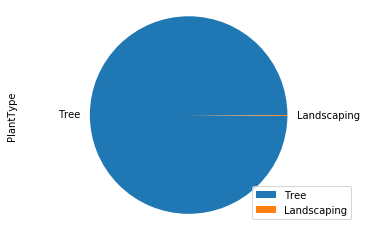

In [34]:
# sns.countplot(x='PlantType',data=data)
#Kayaknya mending dibuat PieChart
type_count= data['PlantType'].value_counts()
type_count.plot(kind='pie')
plt.axis('equal')
plt.legend(loc='lower right')
plt.show()

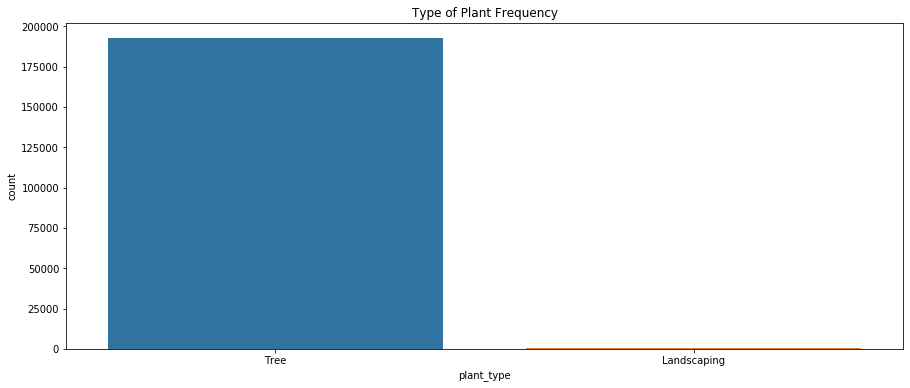

In [35]:
plt.figure(figsize=(15,6))
plt.title('Type of Plant Frequency')
sns.countplot(data = data_tree, x = 'plant_type')

Text(0.5, 1.0, 'Top Tree from Genus: Prunus')

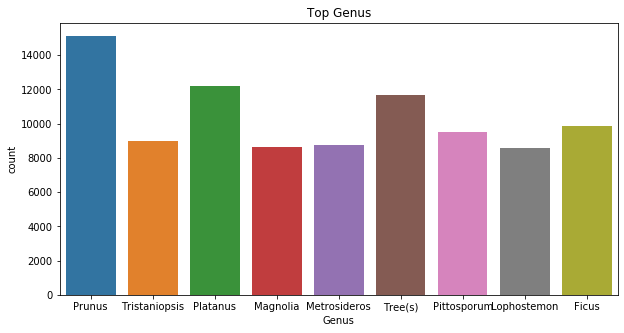

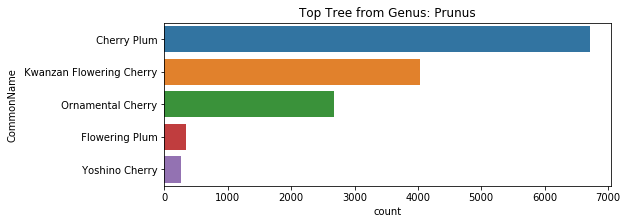

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(x='Genus',data=data, order=['Prunus',
                                          'Tristaniopsis',
                                          'Platanus',
                                          'Magnolia',
                                          'Metrosideros',
                                          'Tree(s)',
                                          'Pittosporum',
                                          'Lophostemon',
                                          'Ficus'])
plt.title('Top Genus')

plt.figure(figsize=(8,3))
var1 = data[data['Genus']=='Prunus']
sns.countplot(y='CommonName', data=var1,
              order=var1.CommonName.value_counts().iloc[:5].index)
plt.title('Top Tree from Genus: Prunus')

In [37]:
data['Genus'].value_counts()

Others           99674
Prunus           15128
Platanus         12178
Tree(s)          11664
Ficus             9842
Pittosporum       9530
Tristaniopsis     8960
Metrosideros      8738
Magnolia          8622
Lophostemon       8576
Name: Genus, dtype: int64

C:\Users\DEPOSIT\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning:

invalid value encountered in greater

C:\Users\DEPOSIT\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning:

invalid value encountered in less



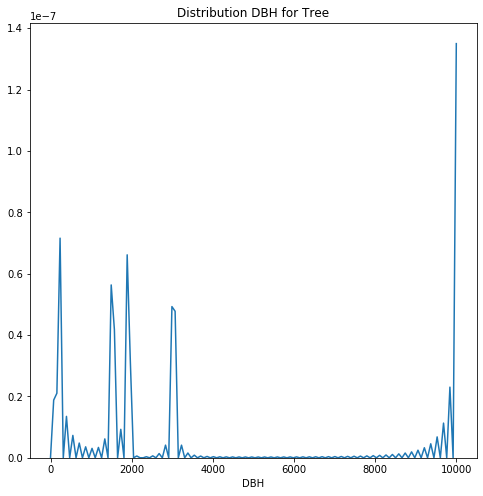

In [38]:
# Plot before cleaning
plt.figure(figsize = (8,8))
plt.title('Distribution DBH for Tree')
sns.distplot(data_tree[data_tree['plant_type'] == 'Tree']['DBH'], hist=None)

In [39]:
data_tree[data_tree['plant_type'] == 'Tree']['DBH'].describe()

count    151045.000000
mean          9.961555
std          29.375697
min           0.000000
25%           3.000000
50%           7.000000
75%          12.000000
max        9999.000000
Name: DBH, dtype: float64

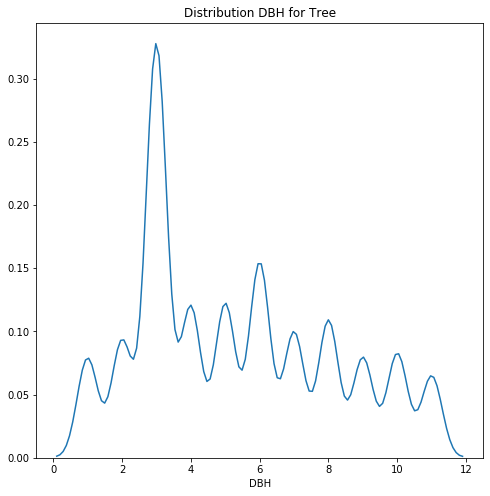

In [40]:
#  After cleaning, melihat persebaran data DBH yang mendekati nilai mean
plt.figure(figsize = (8,8))
plt.title('Distribution DBH for Tree')
sns.distplot(data_tree[(data_tree['plant_type'] == 'Tree') & (data_tree['DBH'] > 0) & (data_tree['DBH'] < 12)]['DBH'].dropna(), hist=None)

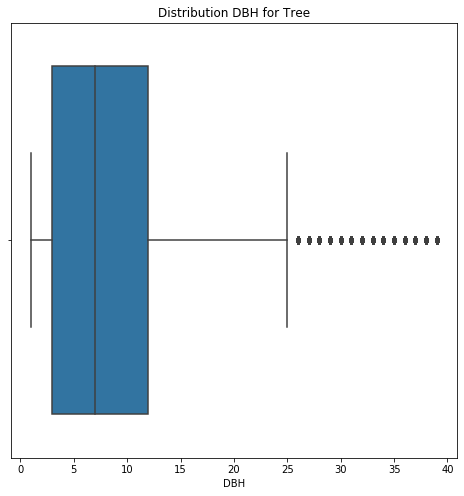

In [41]:
plt.figure(figsize = (8,8))
plt.title('Distribution DBH for Tree')
x = data_tree[(data_tree['DBH'] > 0) & (data_tree['DBH']<40)]
sns.boxplot(x['DBH'].dropna())

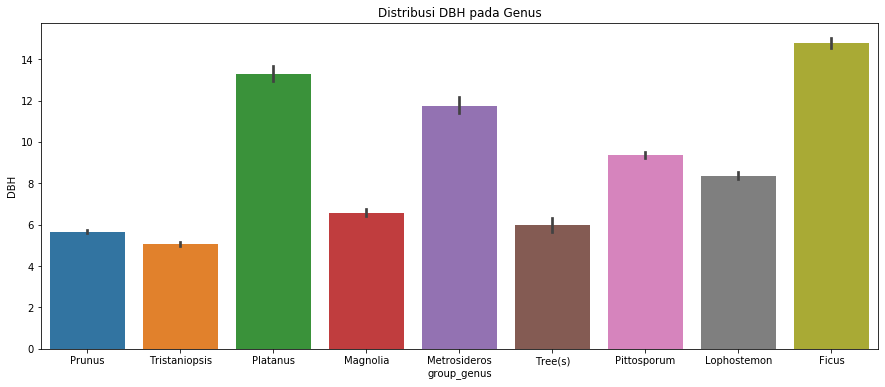

In [42]:
# Distribusi DBH pada top 10 Genus dari Species tree
plt.figure(figsize=(15,6))
plt.title('Distribusi DBH pada Genus')
sns.barplot(x = 'group_genus', y = 'DBH', data = data_tree, order=['Prunus', 'Tristaniopsis', 'Platanus', 'Magnolia', 'Metrosideros', 'Tree(s)', 'Pittosporum', 'Lophostemon', 'Ficus'])

# Visualisasi Location Plant

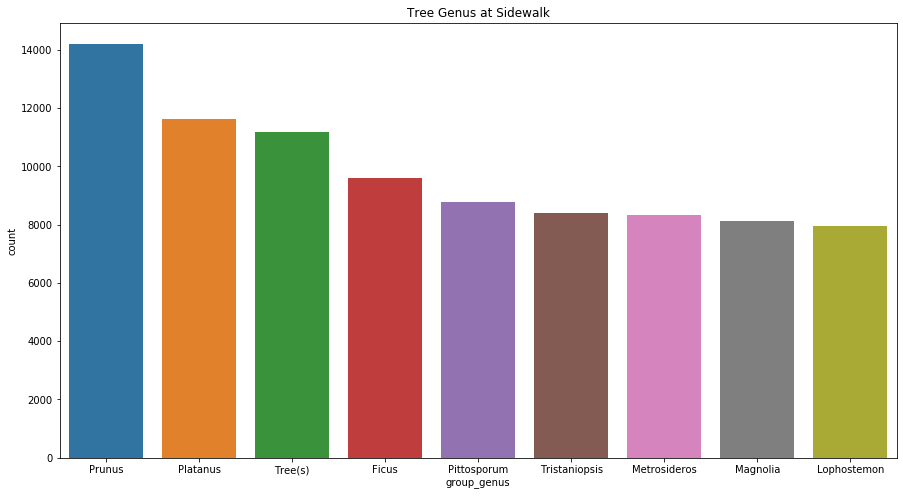

In [43]:
plt.figure(figsize=(15,8))
plt.title('Tree Genus at Sidewalk')
sns.countplot(data = a, x = 'group_genus', order = ['Prunus', 'Platanus', 'Tree(s)', 'Ficus', 
                                                    'Pittosporum', 'Tristaniopsis','Metrosideros', 'Magnolia', 'Lophostemon'])

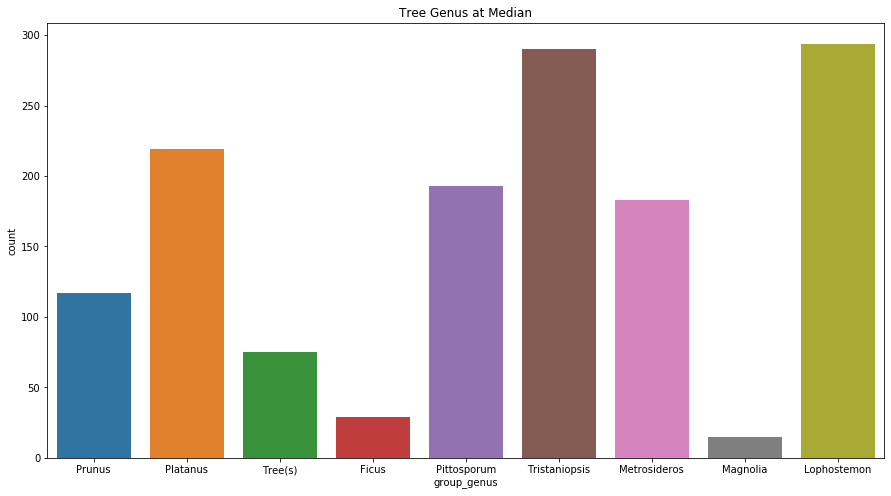

In [44]:
plt.figure(figsize=(15,8))
plt.title('Tree Genus at Median')
sns.countplot(data = b, x = 'group_genus', order = ['Prunus', 'Platanus', 'Tree(s)', 'Ficus', 
                                                    'Pittosporum', 'Tristaniopsis', 'Metrosideros', 'Magnolia', 'Lophostemon'])

In [45]:
list_count_data = list(data_tree['site_info'].value_counts())
label_site = ['Sidewalk','Median', 'unknown', 'Front Yard', 'Side Yard', 'Back Yard', 'Unaccepted Street', 'Hanging basket']
explode_pie = (0.1, 0.1, 0, 0, 0, 0, 0, 0)

(-1.2082651148036896,
 1.1319188544093104,
 -1.0784244605263742,
 1.1356323369209678)

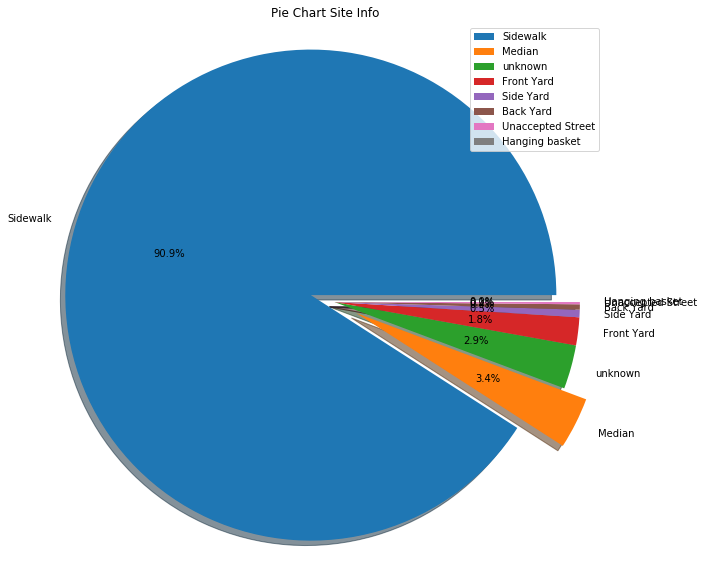

In [46]:
list_count_data = list(data_tree['site_info'].value_counts())
label_site = ['Sidewalk','Median', 'unknown', 'Front Yard', 'Side Yard', 'Back Yard', 'Unaccepted Street', 'Hanging basket']
explode_pie = (0.1, 0.1, 0, 0, 0, 0, 0, 0)

fig1, ax1 = plt.subplots(figsize = (10,10))
ax1.pie(list_count_data, explode = explode_pie, labels=label_site, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')

plt.title('Pie Chart Site Info')
plt.legend(loc = 'upper right')

ax1.axis('equal')
# pie = plt.pie(list_count_data, labels = label_site)
# pie

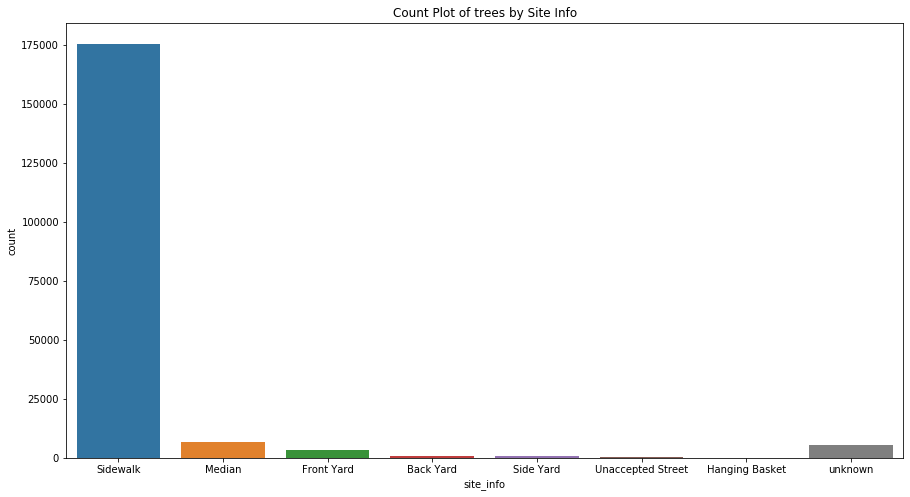

In [47]:
plt.figure(figsize=(15,8))
plt.title('Count Plot of trees by Site Info')
sns.countplot(data = data_tree, x = 'site_info', order = ['Sidewalk', 'Median', 'Front Yard', 'Back Yard', 
                                                          'Side Yard', 'Unaccepted Street', 'Hanging Basket', 'unknown'])

Median               6363
unknown              5568
Front Yard           3517
Side Yard             935
Back Yard             671
Unaccepted Street     263
Hanging basket          2
Name: site_info, dtype: int64

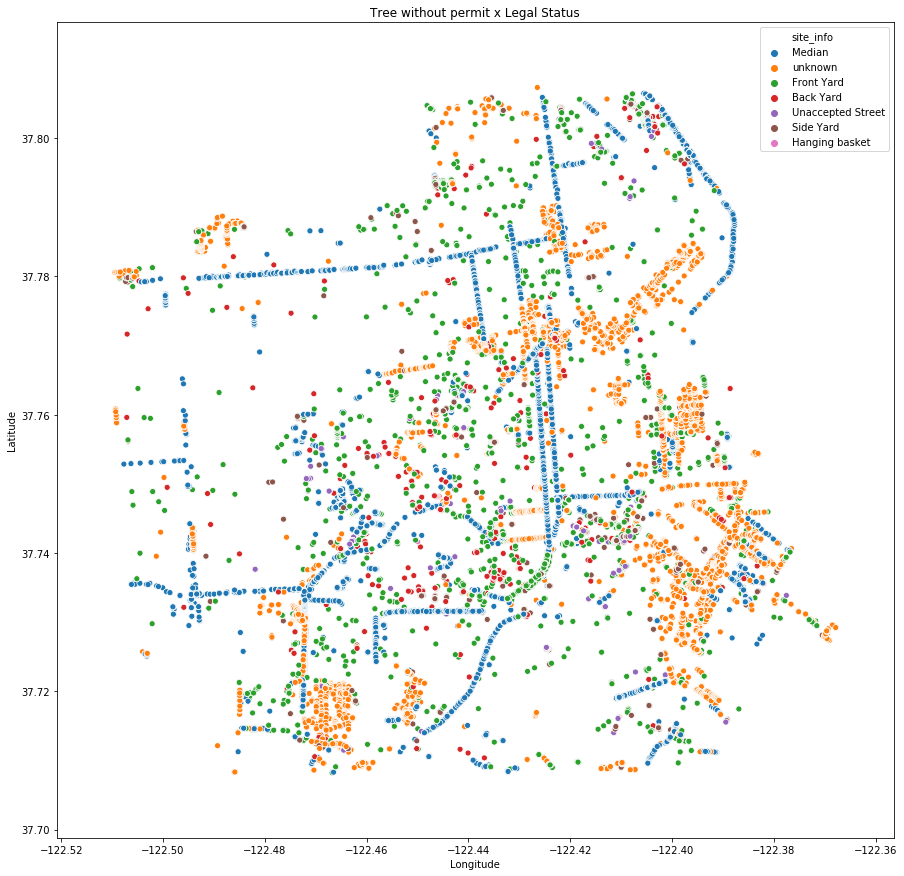

In [48]:
### TREE based on Site Info
plot_data_tree = data_tree.copy()
plot_data_tree = data_tree[(data_tree['Latitude']<40)]
plot_data_tree = data_tree[data_tree['Longitude']>-136]
plot_data_tree = plot_data_tree[(plot_data_tree['Latitude']>37.7)]
plot_data_tree = plot_data_tree[(plot_data_tree['site_info'] != 'Sidewalk')]
# plot_data_tree = plot_data_tree[(plot_data_tree['caretaker_priv_pub'] == 'Public')]

plt.figure(figsize=(15,15))
plt.title('Tree without permit x Legal Status')
sns.scatterplot(plot_data_tree.Longitude, plot_data_tree.Latitude, hue=plot_data_tree.site_info)
plot_data_tree['site_info'].value_counts()

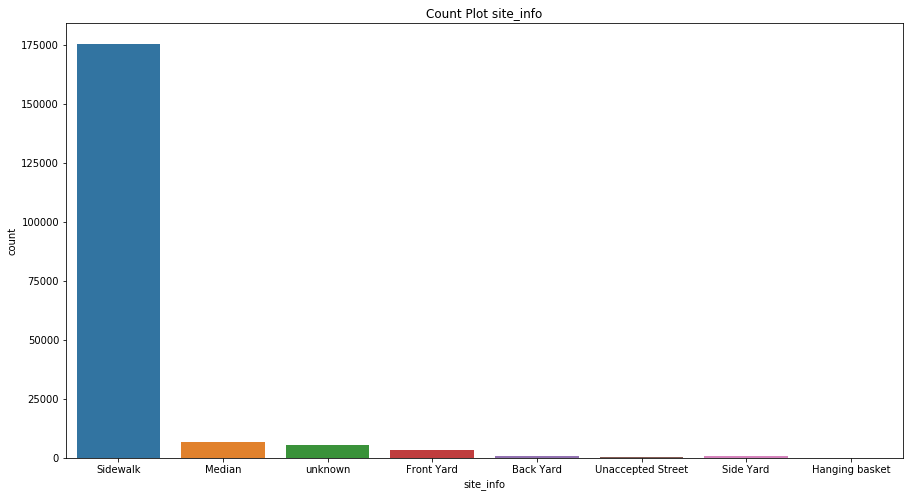

In [49]:
plt.figure(figsize=(15,8))
plt.title('Count Plot site_info')
sns.countplot(data = data_tree, x = 'site_info')

Unknown    124548
2000s       24302
1990s       18767
2010s       12358
1980s        6297
1970s        3994
1910s        2133
1960s         334
1950s         179
Name: plant_years, dtype: int64


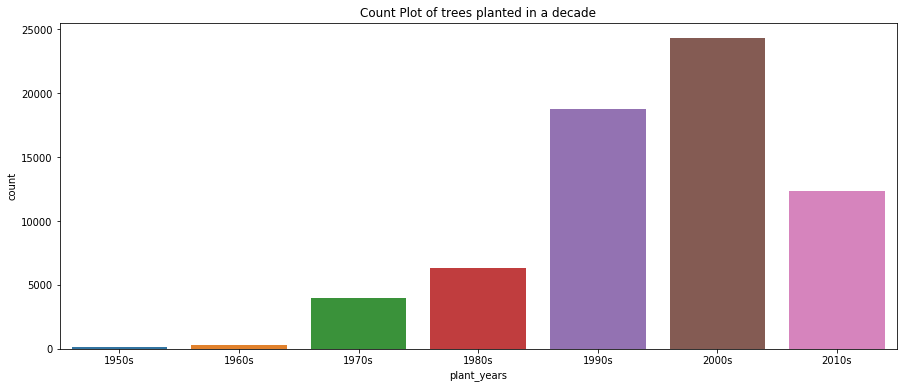

In [50]:
### plant_date(decade) vs jenis pohon

plt.figure(figsize=(15,6))
plt.title('Count Plot of trees planted in a decade')
sns.countplot(data = data_tree, x = 'plant_years', order=['1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s'])
print(data_tree['plant_years'].value_counts())

Others           99674
Prunus           15128
Platanus         12178
Tree(s)          11664
Ficus             9842
Pittosporum       9530
Tristaniopsis     8960
Metrosideros      8738
Magnolia          8622
Lophostemon       8576
Name: group_genus, dtype: int64


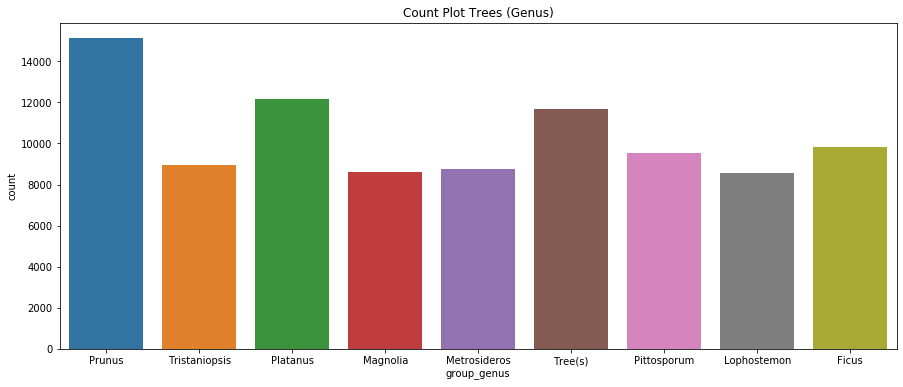

In [51]:
### plant_date vs DBh (vs Jenis Pohon)
plt.figure(figsize=(15,6))
plt.title('Count Plot Trees (Genus)')
sns.countplot(data = data_tree, x = 'group_genus', order=['Prunus', 'Tristaniopsis', 'Platanus', 'Magnolia', 'Metrosideros', 'Tree(s)', 'Pittosporum', 'Lophostemon', 'Ficus'])
print(data_tree['group_genus'].value_counts())

In [52]:
# # ### Latitude > -136; 37.7 < Longitude < 40

# ### Priv vs Publ Plot

# plt.figure(figsize=(10,10))
# sns.scatterplot(data_tree.Longitude, data_tree.Latitude, hue=data_tree.caretaker_priv_pub)
# plt.ioff()

plot_data_tree = data_tree.copy()
plot_data_tree = data_tree[(data_tree['Latitude']<40)]
plot_data_tree = data_tree[data_tree['Longitude']>-136]
plot_data_tree = plot_data_tree[(plot_data_tree['Latitude']>37.7)]

fig = go.Figure(
    data=[go.Scatter(x=plot_data_tree[plot_data_tree['caretaker_priv_pub']=='Private']['Longitude'], 
                     y=plot_data_tree[plot_data_tree['caretaker_priv_pub']=='Private']['Latitude'],
                    mode='markers', name = 'Private'),
         go.Scatter(x=plot_data_tree[plot_data_tree['caretaker_priv_pub']=='Public']['Longitude'], 
                     y=plot_data_tree[plot_data_tree['caretaker_priv_pub']=='Public']['Latitude'],
                    mode='markers', name = 'Public')],
        layout=dict(title=dict(text='A Scatter Plot Figure Displayed with fig'))
)
fig
plotly.offline.plot(fig, filename='Scatter plot based on caretaker.html')

'Scatter plot based on caretaker.html'

Others           99674
Prunus           15128
Platanus         12178
Tree(s)          11664
Ficus             9842
Pittosporum       9530
Tristaniopsis     8960
Metrosideros      8738
Magnolia          8622
Lophostemon       8576
Name: group_genus, dtype: int64


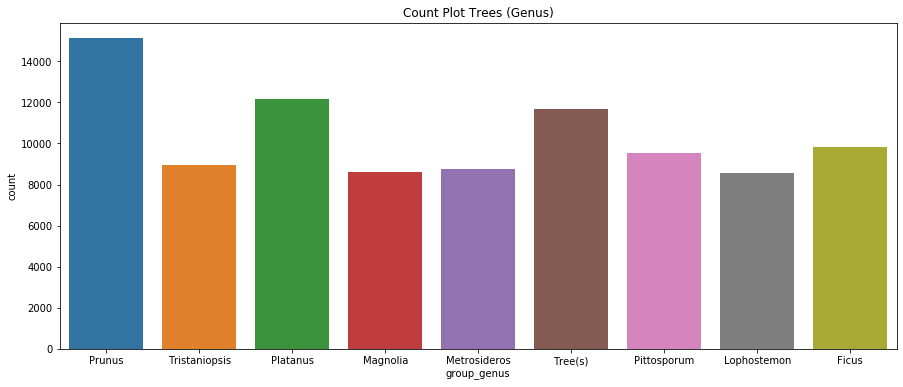

In [53]:
### plant_date 2000s vs DBh (vs Jenis Pohon)
plt.figure(figsize=(15,6))
plt.title('Count Plot Trees (Genus)')
sns.countplot(data = data_tree, x = 'group_genus', order=['Prunus', 'Tristaniopsis', 'Platanus', 'Magnolia', 'Metrosideros', 'Tree(s)', 'Pittosporum', 'Lophostemon', 'Ficus'])
print(data_tree['group_genus'].value_counts())

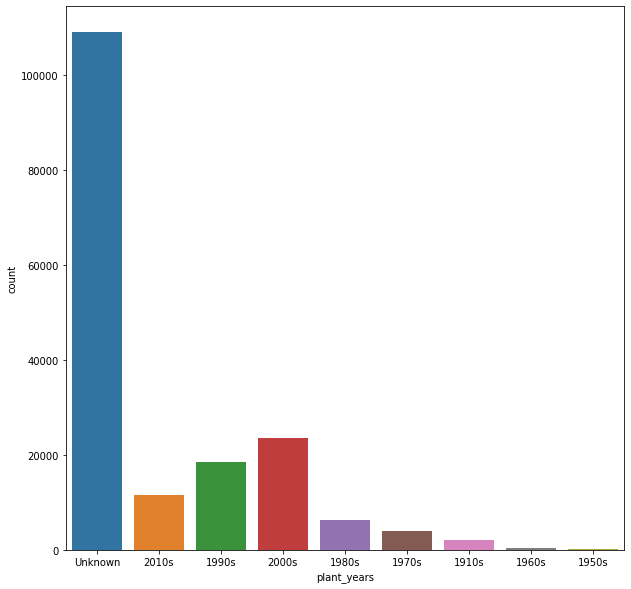

In [54]:
plt.figure(figsize = (10,10))
sns.countplot(data_tree[data_tree['site_info']=='Sidewalk']['plant_years'])

In [55]:
fig = go.Figure(
    data=[go.Scatter(x=plot_data_tree[plot_data_tree['group_genus']=='Prunus']['Longitude'], 
                     y=plot_data_tree[plot_data_tree['group_genus']=='Prunus']['Latitude'],
                    mode='markers', name = 'Prunus'),
        go.Scatter(x=plot_data_tree[plot_data_tree['group_genus']=='Platanus']['Longitude'], 
                     y=plot_data_tree[plot_data_tree['group_genus']=='Platanus']['Latitude'],
                    mode='markers', name = 'Platanus'),
         go.Scatter(x=plot_data_tree[plot_data_tree['group_genus']=='Ficus']['Longitude'], 
                     y=plot_data_tree[plot_data_tree['group_genus']=='Ficus']['Latitude'],
                    mode='markers', name = 'Ficus')],
        layout=dict(title=dict(text='A Scatter Plot Figure Displayed with fig'))
)
# fig
# plotly.offline.plot(fig, filename='Scatter plot based on genus.html')

In [56]:
plant_year_specified = []
for i in range(len(data_tree['plant_date'])):
    plant_year_specified.append(data_tree['plant_date'][i].year)
data_tree['specified_year'] = plant_year_specified

In [57]:
data_tree[(data_tree['group_genus']=='Ficus') & (data_tree['specified_year']==2016)]['qCaretaker'].value_counts()

Private    51
DPW         8
SFUSD       1
Name: qCaretaker, dtype: int64

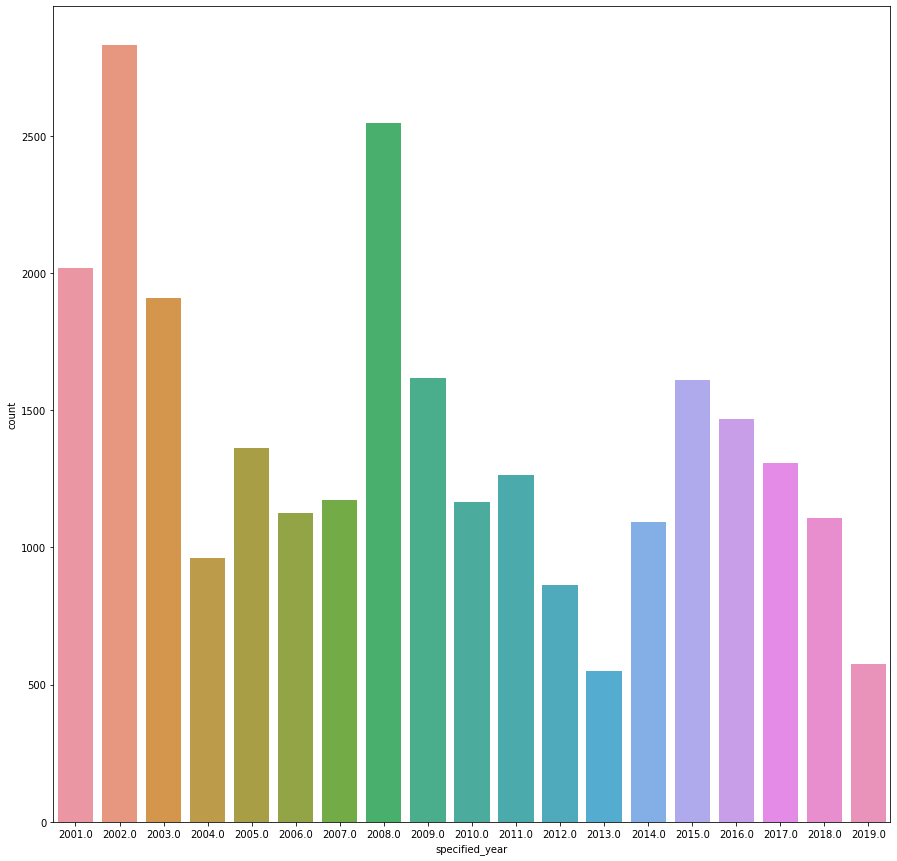

In [58]:
plt.figure(figsize=(15,15))
# sns.countplot(data_tree[(data_tree['qCaretaker']=='DPW') & (data_tree['specified_year']>2000)]['specified_year'])
sns.countplot(data_tree[(data_tree['qCaretaker']=='Private') & (data_tree['specified_year']>2000)]['specified_year'])

In [59]:
plant_year_specified = []
for i in plot_data_tree.index:
    if pd.isna(plot_data_tree['plant_date'][i].year):
        plant_year_specified.append('Unknown')
    else:
        plant_year_specified.append(plot_data_tree['plant_date'][i].year)
plot_data_tree['specified_year'] = plant_year_specified

In [60]:
decades = plot_data_tree['plant_years'].unique()
test = plot_data_tree['specified_year'].value_counts()
test = test[1:]
sort = sorted(test.index)

In [61]:
sorted_value = []
for i in range(len(test)):
    sorted_value.append(test[sort[i]])

C:\Users\DEPOSIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning:

Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.



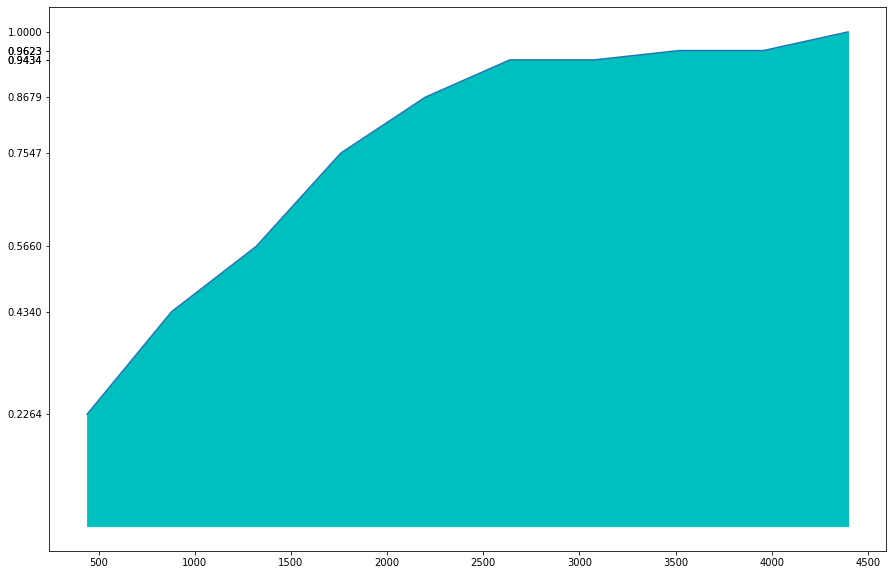

In [62]:
hist, edges = np.histogram(sorted_value, normed = True)
dx = edges[1] - edges[0]
x = np.cumsum(hist)*dx
    
plt.figure(figsize = (15,10))
plt.plot(edges[1:], x)
plt.yticks(x)
plt.fill_between(edges[1:], x, color='c')

In [63]:
new = []
for i in plot_data_tree.index:
    if plot_data_tree['specified_year'][i]=='Unknown':
        pass
    else:
        new.append(plot_data_tree['specified_year'][i])

Text(0, 0.5, 'Plant Count per Year')

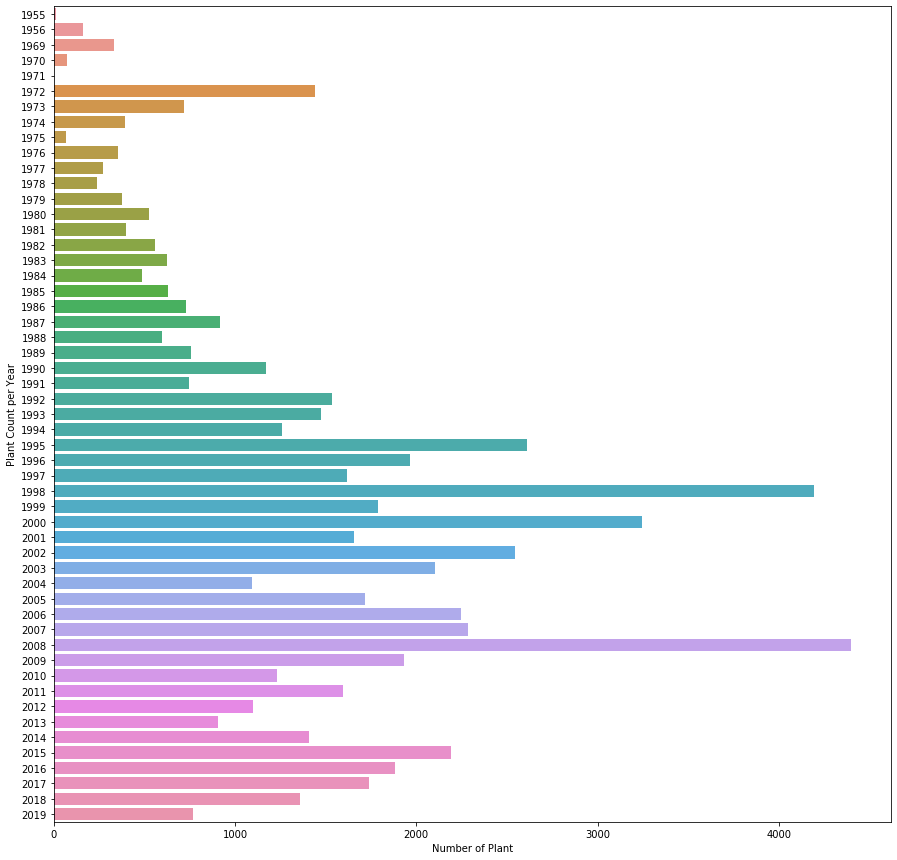

In [64]:
plt.figure(figsize=(15,15))
sns.countplot(y = new)
plt.xlabel('Number of Plant')
plt.ylabel('Plant Count per Year')

Text(0, 0.5, 'Plant Count per Decades')

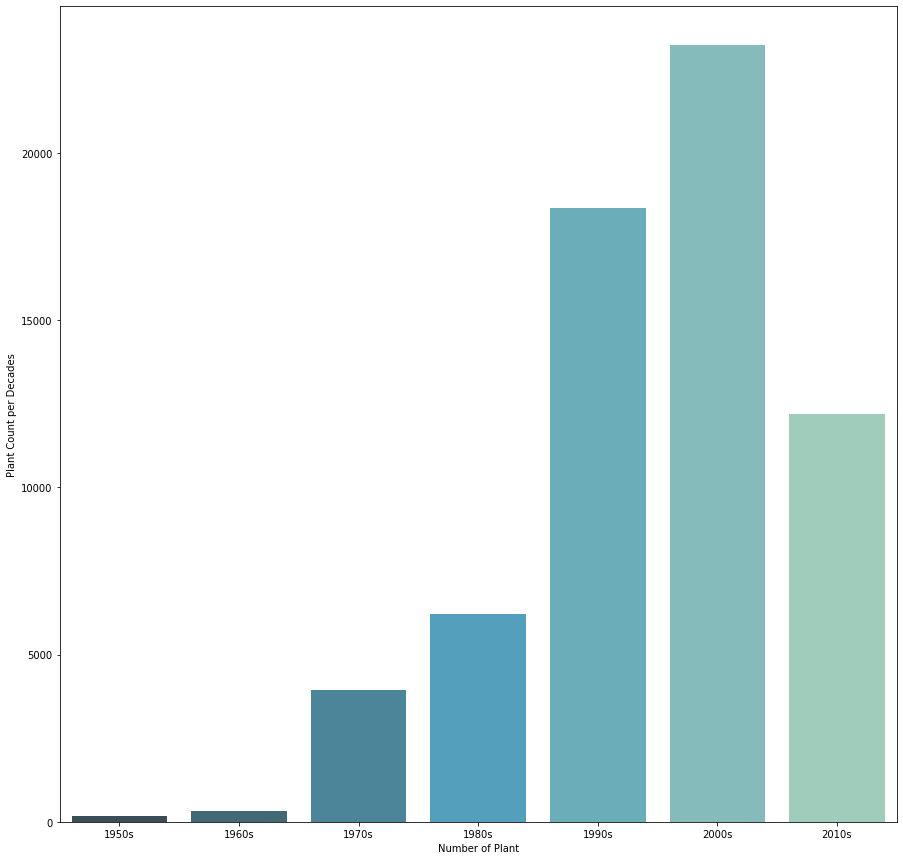

In [65]:
plt.figure(figsize=(15,15))
sns.countplot(plot_data_tree['plant_years'], order = ['1950s','1960s','1970s','1980s','1990s','2000s','2010s'], palette='GnBu_d')
plt.xlabel('Number of Plant')
plt.ylabel('Plant Count per Decades')

In [66]:
genus = plot_data_tree['group_genus'].unique()
d = {}
for i in genus:
    d[i] = []
    for j in plot_data_tree.index:
        if plot_data_tree['specified_year'][j] == 'Unknown':
            pass
        elif plot_data_tree['group_genus'][j]==i:
            d[i].append(plot_data_tree['specified_year'][j])
        else:
            pass
colour = ['red','green','blue','yellow','purple','pink','turquoise','orange','sienna','navy']

In [67]:
decade = {}
for i in genus:
    decade[i] = []
    for j in plot_data_tree.index:
        if plot_data_tree['plant_years'][j]=='Unknown':
            pass
        elif plot_data_tree['group_genus'][j]==i:
            decade[i].append(plot_data_tree['plant_years'][j])
        else:
            pass
colour = ['red','green','blue','yellow','purple','pink','turquoise','orange','sienna','navy']

In [68]:
plot_new = plot_data_tree.copy()

In [69]:
# for i in plot_new.index:
#     if plot_new['specified_year'][i] == 'Unknown':
#         plot_new.drop(i, inplace = True)
#     else:
#         pass

#Prunus

In [70]:
# plt.figure(figsize=(15,10))
# sns.countplot(plot_data_tree[(plot_data_tree['group_genus']=='Prunus')&(plot_data_tree['specified_year']>2000)]['specified_year'])
# plt.xlabel('Years')
# plt.ylabel('Number of "Prunus" Genus Trees')

In [71]:
# plt.figure(figsize=(15,10))
# sns.distplot(d['Prunus'], hist=False, label = 'Prunus', color='green', bins=100)

#Tristaniopsis

In [72]:
# plt.figure(figsize=(15,10))
# sns.countplot(plot_data_tree[(plot_data_tree['group_genus']=='Tristaniopsis')&(plot_data_tree['specified_year']>2000)]['specified_year'])
# plt.xlabel('Years')
# plt.ylabel('Number of "Tristaniopsis" Genus Trees')

In [73]:
# plt.figure(figsize=(15,10))
# sns.distplot(d['Tristaniopsis'], hist=False, label = 'Tristaniopsis', color='blue', bins=100)

### Platanus

In [74]:
# plt.figure(figsize=(15,10))
# sns.countplot(plot_data_tree[(plot_data_tree['group_genus']=='Platanus')&(plot_data_tree['specified_year']>2000)]['specified_year'])
# plt.xlabel('Years')
# plt.ylabel('Number of "Platanus" Genus Trees')

In [75]:
# plt.figure(figsize=(15,10))
# sns.distplot(d['Platanus'], hist=False, label = 'Platanus', color='yellow', bins=100)

### Magnolia

In [76]:
# plt.figure(figsize=(15,10))
# sns.countplot(plot_data_tree[(plot_data_tree['group_genus']=='Magnolia')&(plot_data_tree['specified_year']>2000)]['specified_year'])
# plt.xlabel('Years')
# plt.ylabel('Number of "Magnolia" Genus Trees')

In [77]:
# plt.figure(figsize=(15,10))
# sns.distplot(d['Magnolia'], hist=False, label = 'Magnolia', color='purple', bins=100)

### Metrosideros

In [78]:
# plt.figure(figsize=(15,10))
# sns.countplot(plot_data_tree[(plot_data_tree['group_genus']=='Metrosideros')&(plot_data_tree['specified_year']>2000)]['specified_year'])
# plt.xlabel('Years')
# plt.ylabel('Number of "Metrosideros" Genus Trees')

In [79]:
# plt.figure(figsize=(15,10))
# sns.distplot(d['Metrosideros'], hist=False, label = 'Metrosideros', color='pink', bins=100)

### Pittosporum

In [80]:
# plt.figure(figsize=(15,10))
# sns.countplot(plot_data_tree[(plot_data_tree['group_genus']=='Pittosporum')&(plot_data_tree['specified_year']>2000)]['specified_year'])
# plt.xlabel('Years')
# plt.ylabel('Number of "Pittosporum" Genus Trees')

In [81]:
# plt.figure(figsize=(15,10))
# sns.distplot(d['Pittosporum'], hist=False, label = 'Pittosporum', color='orange', bins=100)

### Lophostemon

In [82]:
# plt.figure(figsize=(15,10))
# sns.countplot(plot_data_tree[(plot_data_tree['group_genus']=='Lophostemon')&(plot_data_tree['specified_year']>2000)]['specified_year'])
# plt.xlabel('Years')
# plt.ylabel('Number of "Lophostemon" Genus Trees')

In [83]:
# plt.figure(figsize=(15,10))
# sns.distplot(d['Lophostemon'], hist=False, label = 'Lophostemon', color='sienna', bins=100)

### Ficus

In [84]:
# plt.figure(figsize=(15,10))
# sns.countplot(plot_data_tree[(plot_data_tree['group_genus']=='Ficus')&(plot_data_tree['specified_year']>2000)]['specified_year'])
# plt.xlabel('Years')
# plt.ylabel('Number of "Ficus" Genus Trees')

In [85]:
# plt.figure(figsize=(15,10))
# sns.countplot(y = plot_data_tree[(plot_data_tree['group_genus']=='Ficus')]['specified_year'])
# plt.ylabel('Years')
# plt.xlabel('Number of "Ficus" Genus Trees')

In [86]:
# plt.figure(figsize=(15,10))
# sns.countplot(y = plot_data_tree[(plot_data_tree['group_genus']=='Ficus')&(plot_data_tree['specified_year']<2015)]['specified_year'])
# plt.ylabel('Years')
# plt.xlabel('Number of "Ficus" Genus Trees')

In [87]:
# plt.figure(figsize=(15,10))
# sns.countplot(y = plot_data_tree[(plot_data_tree['group_genus']=='Ficus')&(plot_data_tree['specified_year']>=2015)]['specified_year'], palette='autumn')
# plt.ylabel('Years')
# plt.xlabel('Number of "Ficus" Genus Trees')

In [88]:
# plt.figure(figsize=(15,10))
# sns.distplot(d['Ficus'], hist=False, label = 'Ficus', color='navy', bins=100)
# plt.axvline(2015)

### Combined

In [89]:
# plt.figure(figsize=(15,10))
# for i in range(len(genus)):
#     sns.distplot(d[genus[i]], hist=False, label = genus[i], color=colour[i], bins=100)

In [90]:
# plt.figure(figsize=(15,10))
# for i in range(len(genus)):
#     sns.countplot(decade[genus[i]], order = ['1950s','1960s','1970s','1980s','1990s','2000s','2010s'])

In [91]:
# plt.figure(figsize=(15,10))
# for i in range(len(genus)):
#     sns.countplot(decade[genus[i]], order = ['1950s','1960s','1970s','1980s','1990s','2000s','2010s'])

In [92]:
# plt.figure(figsize=(15,10))
# for i in range(len(genus)):
#     sns.countplot(y = d[genus[i]], color = colour[i]) 

### Scatter

In [93]:
# fig = go.Figure(
#     data=[go.Scatter(
#                 x=plot_data_tree[(data_tree['plant_years']==i)]['Longitude'], 
#                 y=plot_data_tree[(data_tree['plant_years']==i)]['Latitude'],
#                 mode='markers', name = i) for i in decades
#     ],
#     layout=dict(title=dict(text='A Scatter Plot Figure Displayed with fig'))
# )
# fig
# plotly.offline.plot(fig, filename='Scatter plot based on Plant Decades.html')

### 1950s

In [94]:
# decade_based = {}

# for i in decades:
#     gens = {}
#     for j in genus:
#         gens[j] = plot_data_tree[plot_data_tree['plant_years']==i]['group_genus'].value_counts()[j]
#     decade_based[i] = gens

In [95]:
# plt.figure(figsize=(15,10))
# sns.countplot(plot_data_tree[plot_data_tree['plant_years']=='Unknown']['group_genus'])
# plt.xlabel('Group Genus')
# plt.ylabel('Plants Genus Planted in Unknown Decade')

In [96]:
# plt.figure(figsize=(15,10))
# sns.countplot(plot_data_tree[plot_data_tree['plant_years']=='1910s']['group_genus'])
# plt.xlabel('Group Genus')
# plt.ylabel('Plants Genus Planted in 1910s')

In [97]:
# plt.figure(figsize=(15,10))
# sns.countplot(plot_data_tree[plot_data_tree['plant_years']=='1950s']['group_genus'])
# plt.xlabel('Group Genus')
# plt.ylabel('Plants Genus Planted in 1950s')

In [98]:
# plt.figure(figsize=(15,10))
# sns.countplot(plot_data_tree[plot_data_tree['plant_years']=='1960s']['group_genus'])
# plt.xlabel('Group Genus')
# plt.ylabel('Plants Genus Planted in 1960s')

In [99]:
# plt.figure(figsize=(15,10))
# sns.countplot(plot_data_tree[plot_data_tree['plant_years']=='1970s']['group_genus'])
# plt.xlabel('Group Genus')
# plt.ylabel('Plants Genus Planted in 1970s')

In [100]:
# plt.figure(figsize=(15,10))
# sns.countplot(plot_data_tree[plot_data_tree['plant_years']=='1980s']['group_genus'])
# plt.xlabel('Group Genus')
# plt.ylabel('Plants Genus Planted in 1980s')

In [101]:
# plt.figure(figsize=(15,10))
# sns.countplot(plot_data_tree[plot_data_tree['plant_years']=='1990s']['group_genus'])
# plt.xlabel('Group Genus')
# plt.ylabel('Plants Genus Planted in 1990s')

In [102]:
# plt.figure(figsize=(15,10))
# sns.countplot(plot_data_tree[plot_data_tree['plant_years']=='2000s']['group_genus'])
# plt.xlabel('Group Genus')
# plt.ylabel('Plants Genus Planted in 2000s')

In [103]:
# plt.figure(figsize=(15,10))
# sns.countplot(plot_data_tree[plot_data_tree['plant_years']=='2010s']['group_genus'])
# plt.xlabel('Group Genus')
# plt.ylabel('Plants Genus Planted in 2010s')

In [104]:
# G. Ficus

In [105]:
# decades = plot_data_tree['plant_years'].unique()
# decades

In [106]:
# fig = go.Figure(
#     data=[go.Scatter(
#                 x=plot_data_tree[(plot_data_tree['group_genus']=='Ficus')&(data_tree['plant_years']==i)]['Longitude'], 
#                 y=plot_data_tree[(plot_data_tree['group_genus']=='Ficus')&(data_tree['plant_years']==i)]['Latitude'],
#                 mode='markers', name = i) for i in decades
#     ],
#     layout=dict(title=dict(text='A Scatter Plot Figure Displayed with fig'))
# )
# fig
# plotly.offline.plot(fig, filename='Scatter plot based on Ficus Plant Decades.html')

In [107]:
# years = plot_data_tree['specified_year'].unique()
# years

In [108]:
# fig = go.Figure(
#     data=[go.Scatter(
#                 x=plot_data_tree[(plot_data_tree['group_genus']=='Ficus')&(data_tree['specified_year']==i)]['Longitude'], 
#                 y=plot_data_tree[(plot_data_tree['group_genus']=='Ficus')&(data_tree['specified_year']==i)]['Latitude'],
#                 mode='markers', name = i) for i in years
#     ],
#     layout=dict(title=dict(text='A Scatter Plot Figure Displayed with fig'))
# )
# fig
# plotly.offline.plot(fig, filename='Scatter plot based on Ficus Plant Year.html')

In [109]:
# plt.figure(figsize=(15,10))
# sns.countplot(y = plot_data_tree[(plot_data_tree['group_genus']=='Ficus')&(plot_data_tree['qCaretaker']=='DPW')&(plot_data_tree['specified_year']>=2015)]['specified_year'], palette='autumn')
# plt.ylabel('Years')
# plt.xlabel('Number of "Ficus" Genus Trees')

In [110]:
# plt.figure(figsize=(15,10))
# sns.countplot(y = plot_data_tree[(plot_data_tree['group_genus']=='Ficus')&(plot_data_tree['qCaretaker']=='DPW')&(plot_data_tree['specified_year']<2015)]['specified_year'], palette='autumn')
# plt.ylabel('Years')
# plt.xlabel('Number of "Ficus" Genus Trees')

In [111]:
# plt.figure(figsize=(15,10))
# sns.countplot(y = plot_data_tree[(plot_data_tree['group_genus']=='Ficus')&(plot_data_tree['qCaretaker']=='DPW')]['specified_year'], palette='autumn')
# plt.ylabel('Years')
# plt.xlabel('Number of "Ficus" Genus Trees')

In [112]:
# plt.figure(figsize=(15,10))
# sns.distplot(d['Ficus'], hist=False, label = 'Ficus', color='r', bins=100)

In [113]:
# colour = ['red','green','blue','yellow','purple','pink','turquoise','orange','sienna','navy']

In [114]:
# x = {}
# for i in genus:
#     x[i] = []
#     for j in plot_data_tree.index:
#         if pd.isna(plot_data_tree['specified_year'][j]):
#             pass
#         elif (plot_data_tree['group_genus'][j]==i)&(plot_data_tree['qCaretaker'][j]=='DPW'):
#             x[i].append(plot_data_tree['specified_year'][j])
#         else:
#             pass

In [115]:
# plt.figure(figsize=(15,10))
# sns.distplot(x['Ficus'], hist=False, label = 'Ficus', color='r', bins=100)
# plt.axvline(2015)
# plt.xlabel('Year')
# plt.ylabel('Number of Ficus tree which DPW is caretaker')

In [116]:
ficus_only = plot_data_tree[plot_data_tree['group_genus']=='Ficus']

In [117]:
ficus_only['specified_year'].fillna(0, inplace=True)

def change_type(x):
    x = str(x)
    return x[:4]

ficus_only['specified_year'] = ficus_only['specified_year'].apply(change_type)

C:\Users\DEPOSIT\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DEPOSIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [118]:
for i in ficus_only.index:
    if ficus_only['specified_year'][i]=='0.0':
        ficus_only.drop(i, inplace=True)
    else:
        pass

Text(0.5, 1.0, 'Ficus Plant Count per Year')

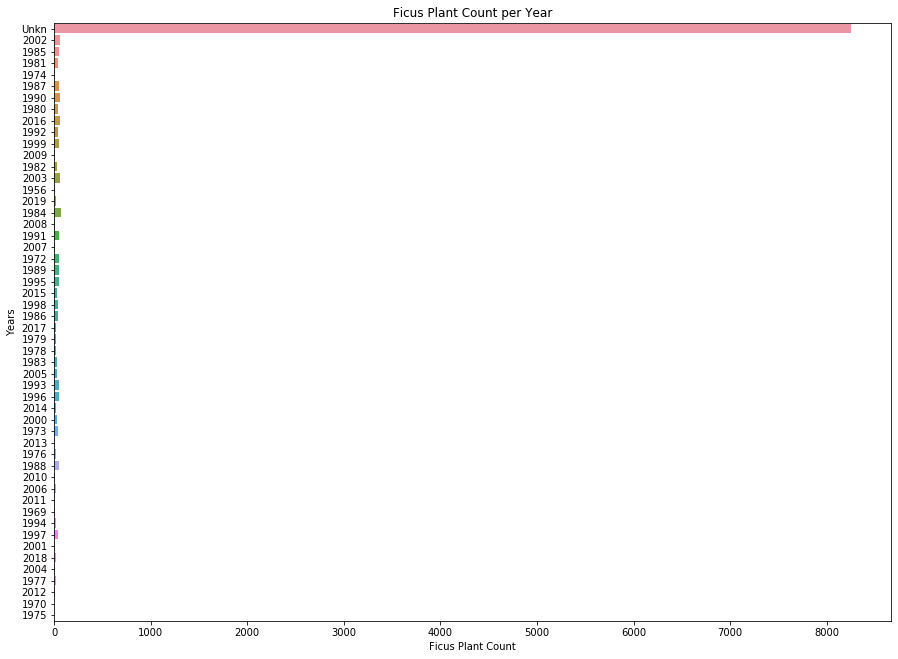

In [119]:
plt.figure(figsize=(15,11))
sns.countplot(y = ficus_only['specified_year'])
plt.xlabel('Ficus Plant Count')
plt.ylabel('Years')
plt.title('Ficus Plant Count per Year')

# Plant Caretaker

Private                    161901
DPW                         27320
SFUSD                        1089
Rec/Park                      726
Port                          723
PUC                           261
DPW for City Agency           203
MTA                           106
Dept of Real Estate            87
Purchasing Dept                85
Housing Authority              73
Fire Dept                      68
Health Dept                    55
Police Dept                    50
Mayor Office of Housing        36
Public Library                 34
Arts Commission                31
Office of Mayor                26
War Memorial                   20
City College                   11
Asian Arts Commission           6
Cleary Bros. Landscape          1
Name: qCaretaker, dtype: int64


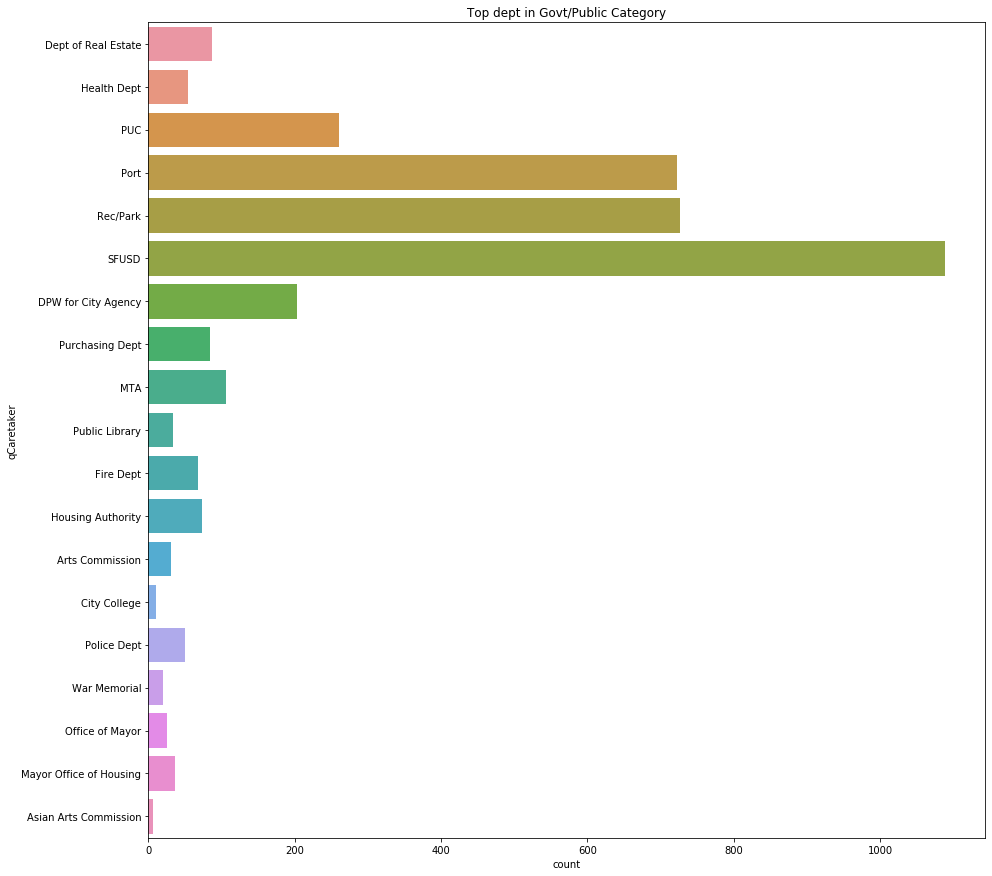

In [145]:
plt.figure(figsize=(15,15))
plt.title('Top dept in Govt/Public Category')
sns.countplot(data = data_tree[(data_tree['caretaker_priv_pub']=='Public') & (data_tree['qCaretaker']!='DPW')], 
              y = 'qCaretaker',orient = 'v')

# (chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right'))
print (data_tree['qCaretaker'].value_counts())

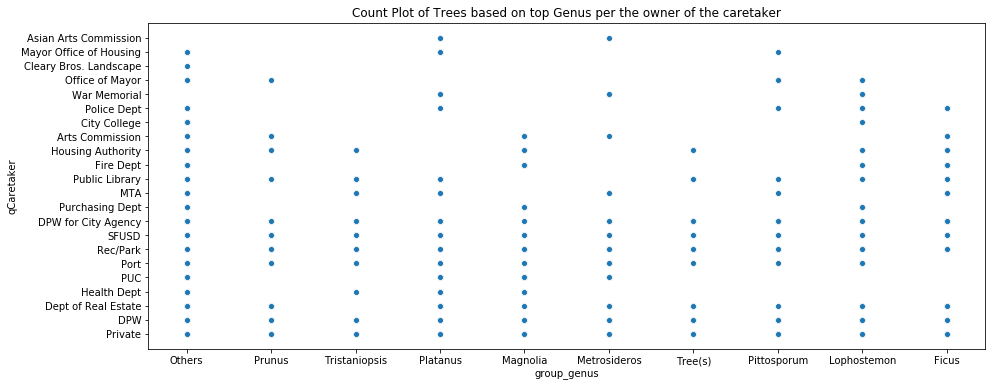

In [146]:
plt.figure(figsize=(15,6))
plt.title('Count Plot of Trees based on top Genus per the owner of the caretaker')
sns.scatterplot(data = data_tree, x = 'group_genus', y = 'qCaretaker')

FUF                       22834
DPW for City Agency         797
DPW                         262
Private                     150
Cleary Bros. Landscape      117
SFUSD                       104
Rec/Park                     34
MTA                          22
Port                         14
City College                  5
Fire Dept                     5
Dept of Real Estate           2
Arts Commission               1
Housing Authority             1
Health Dept                   1
Name: qCareAssistant, dtype: int64


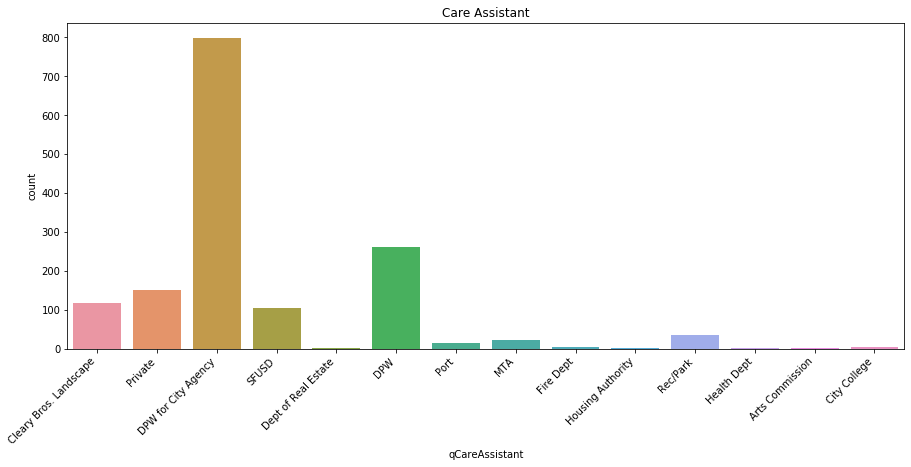

In [147]:
plt.figure(figsize=(15,6))
plt.title('Care Assistant')
CareAss = sns.countplot(data = data_tree[(data_tree['qCareAssistant']!='FUF')], x = 'qCareAssistant')

(CareAss.set_xticklabels(CareAss.get_xticklabels(), rotation=45, horizontalalignment='right'))
print (data_tree['qCareAssistant'].value_counts())

# Plant Permit

In [120]:
data_tree['permit_notes'].value_counts()

No     140710
Yes     52202
Name: permit_notes, dtype: int64

No     139518
Yes     50437
Name: permit_notes, dtype: int64

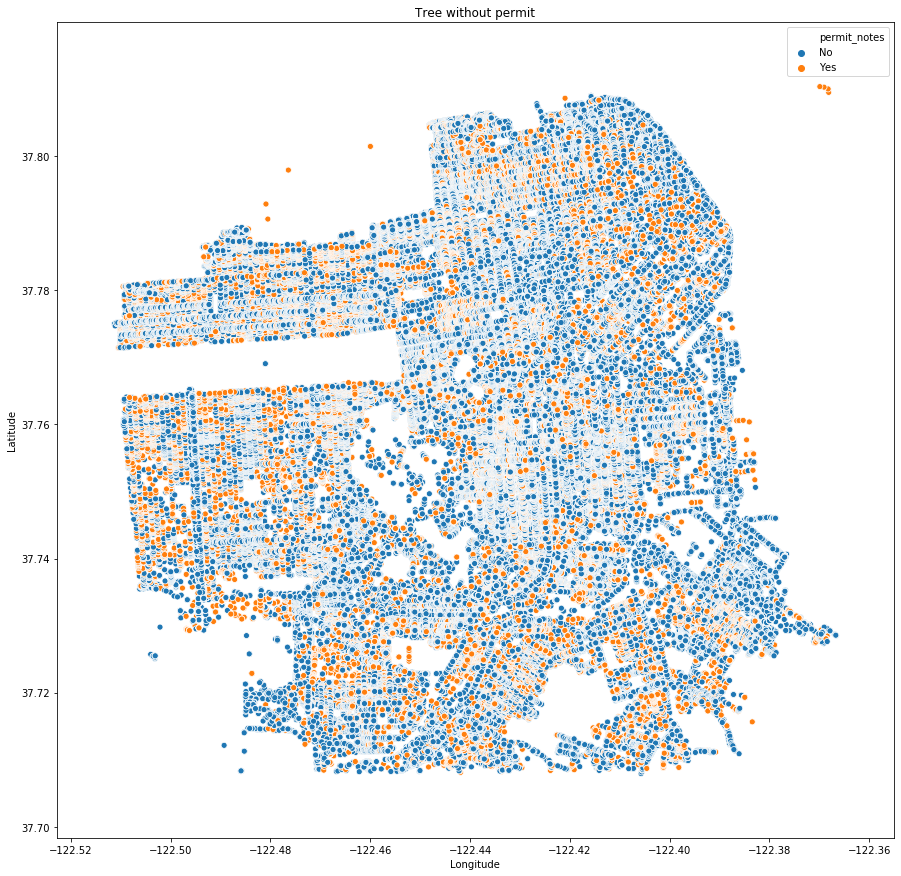

In [121]:
### TREE WITHOUT PERMIT SCATTER PLOT
plot_data_tree = data_tree.copy()
plot_data_tree = data_tree[(data_tree['Latitude']<40)]
plot_data_tree = data_tree[data_tree['Longitude']>-136]
plot_data_tree = plot_data_tree[(plot_data_tree['Latitude']>37.7)]

# fig = go.Figure(
#     data=[go.Scatter(x=plot_data_tree[plot_data_tree['permit_notes']=='No']['Longitude'], 
#                      y=plot_data_tree[plot_data_tree['permit_notes']=='No']['Latitude'],
#                     mode='markers', name = 'No')
#          ],
#         layout=dict(title=dict(text='Trees without permit'))
# )
# fig

plt.figure(figsize=(15,15))
plt.title('Tree without permit')
sns.scatterplot(plot_data_tree.Longitude, plot_data_tree.Latitude, hue=plot_data_tree.permit_notes)
plot_data_tree['permit_notes'].value_counts()

Private    110500
Public      29018
Name: caretaker_priv_pub, dtype: int64

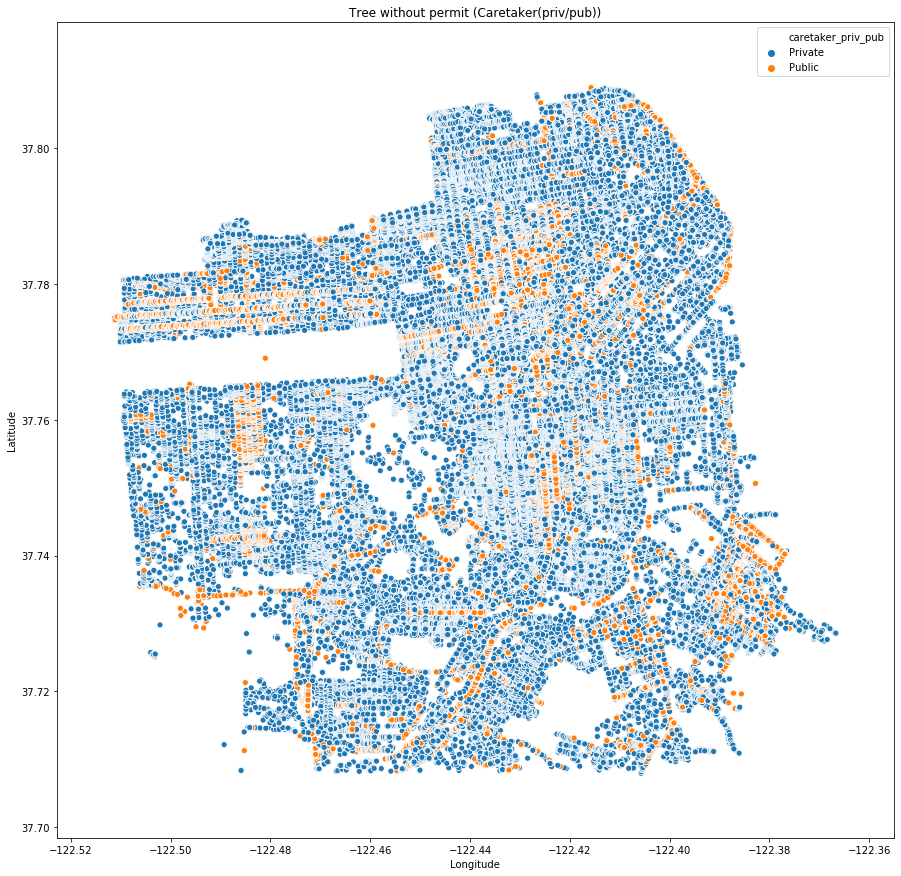

In [122]:
### TREE WITHOUT PERMIT 
plot_data_tree = data_tree.copy()
plot_data_tree = data_tree[(data_tree['Latitude']<40)]
plot_data_tree = data_tree[data_tree['Longitude']>-136]
plot_data_tree = plot_data_tree[(plot_data_tree['Latitude']>37.7)]
plot_data_tree = plot_data_tree[(plot_data_tree['permit_notes'] == 'No')]

plt.figure(figsize=(15,15))
plt.title('Tree without permit (Caretaker(priv/pub))')
sns.scatterplot(plot_data_tree.Longitude, plot_data_tree.Latitude, hue=plot_data_tree.caretaker_priv_pub)
plot_data_tree['caretaker_priv_pub'].value_counts()

DPW                        25781
SFUSD                        819
Port                         717
Rec/Park                     649
PUC                          259
DPW for City Agency          150
MTA                          106
Purchasing Dept               85
Dept of Real Estate           80
Fire Dept                     64
Health Dept                   55
Housing Authority             55
Police Dept                   50
Mayor Office of Housing       36
Public Library                27
Office of Mayor               25
Arts Commission               24
War Memorial                  20
City College                  11
Asian Arts Commission          5
Name: qCaretaker, dtype: int64

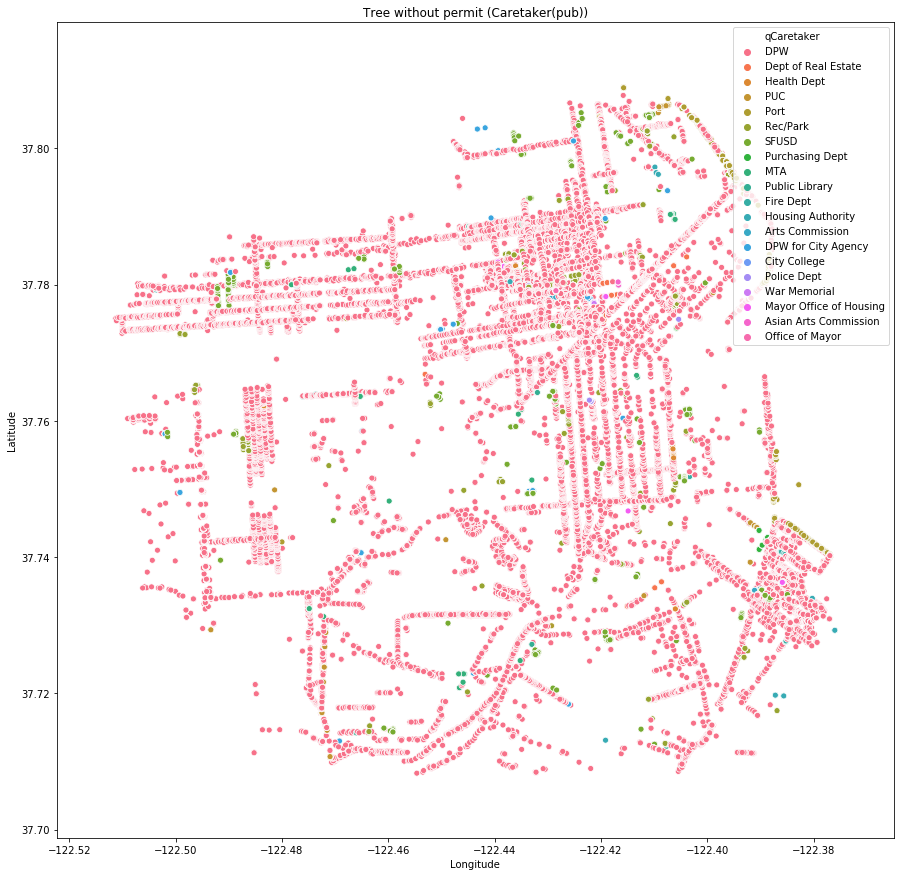

In [123]:
### TREE WITHOUT PERMIT public
plot_data_tree = data_tree.copy()
plot_data_tree = data_tree[(data_tree['Latitude']<40)]
plot_data_tree = data_tree[data_tree['Longitude']>-136]
plot_data_tree = plot_data_tree[(plot_data_tree['Latitude']>37.7)]
plot_data_tree = plot_data_tree[(plot_data_tree['permit_notes'] == 'No')]
plot_data_tree = plot_data_tree[(plot_data_tree['caretaker_priv_pub'] == 'Public')]

plt.figure(figsize=(15,15))
plt.title('Tree without permit (Caretaker(pub))')
sns.scatterplot(plot_data_tree.Longitude, plot_data_tree.Latitude, hue=plot_data_tree.qCaretaker)
plot_data_tree['qCaretaker'].value_counts()

C:\Users\DEPOSIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



DPW                        25781
SFUSD                        819
Port                         717
Rec/Park                     649
PUC                          259
DPW for City Agency          150
MTA                          106
Purchasing Dept               85
Dept of Real Estate           80
Fire Dept                     64
Health Dept                   55
Housing Authority             55
Police Dept                   50
Mayor Office of Housing       36
Public Library                27
Office of Mayor               25
Arts Commission               24
War Memorial                  20
City College                  11
Asian Arts Commission          5
Name: qCaretaker, dtype: int64

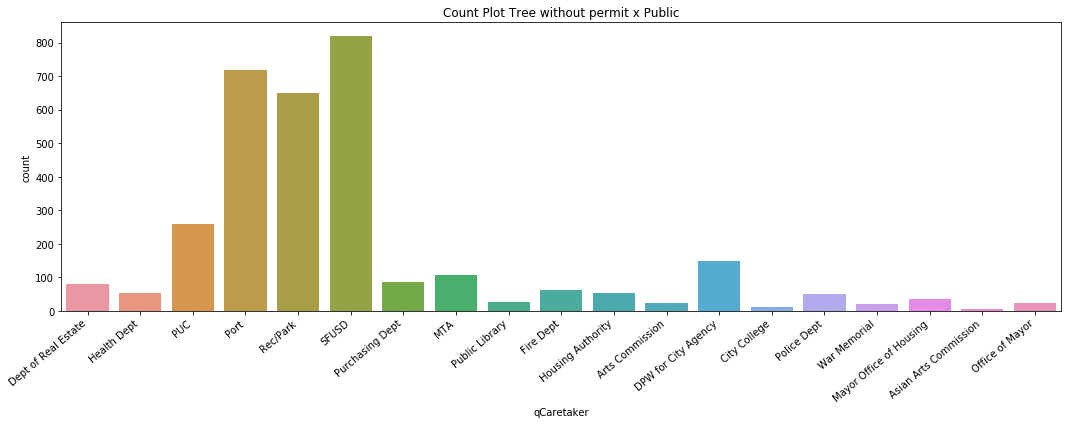

In [124]:
plt.figure(figsize=(15,6))
plt.title('Count Plot Tree without permit x Public')
ax = sns.countplot(data = plot_data_tree[(plot_data_tree['caretaker_priv_pub']=='Public') & (data_tree['permit_notes']=='No') & (data_tree['qCaretaker']!='DPW')], x = 'qCaretaker')
plot_data_tree['qCaretaker'].value_counts()
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
# plt.show()
plot_data_tree['qCaretaker'].value_counts()

In [125]:
data_tree['qLegalStatus'].value_counts()

DPW Maintained                  141695
Permitted Site                   39750
Undocumented                      8072
Significant Tree                  1631
Planning Code 138.1 required       949
Property Tree                      326
Section 143                        229
Private                            161
Landmark tree                       43
Name: qLegalStatus, dtype: int64

C:\Users\DEPOSIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



DPW Maintained                  26789
Permitted Site                   1348
Undocumented                      614
Property Tree                     104
Significant Tree                   95
Landmark tree                      20
Private                             8
Planning Code 138.1 required        4
Name: qLegalStatus, dtype: int64

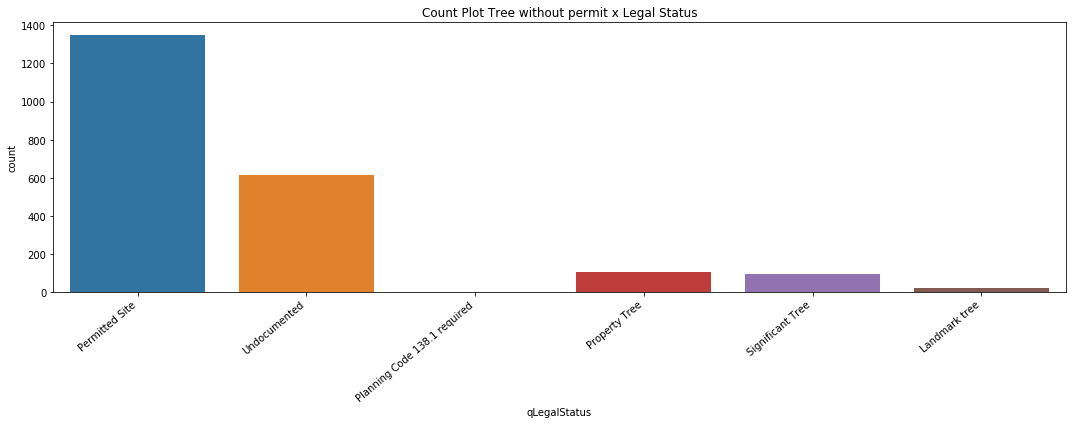

In [126]:
plt.figure(figsize=(15,6))
plt.title('Count Plot Tree without permit x Legal Status')
ax2 = sns.countplot(data = plot_data_tree[(data_tree['permit_notes']=='No') & (data_tree['qLegalStatus'] != 'DPW Maintained') & (data_tree['qLegalStatus'] != 'Private')], x = 'qLegalStatus')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
# plt.show()
plot_data_tree['qLegalStatus'].value_counts()

DPW Maintained                  26789
Permitted Site                   1348
Undocumented                      614
Property Tree                     104
Significant Tree                   95
Landmark tree                      20
Private                             8
Planning Code 138.1 required        4
Name: qLegalStatus, dtype: int64

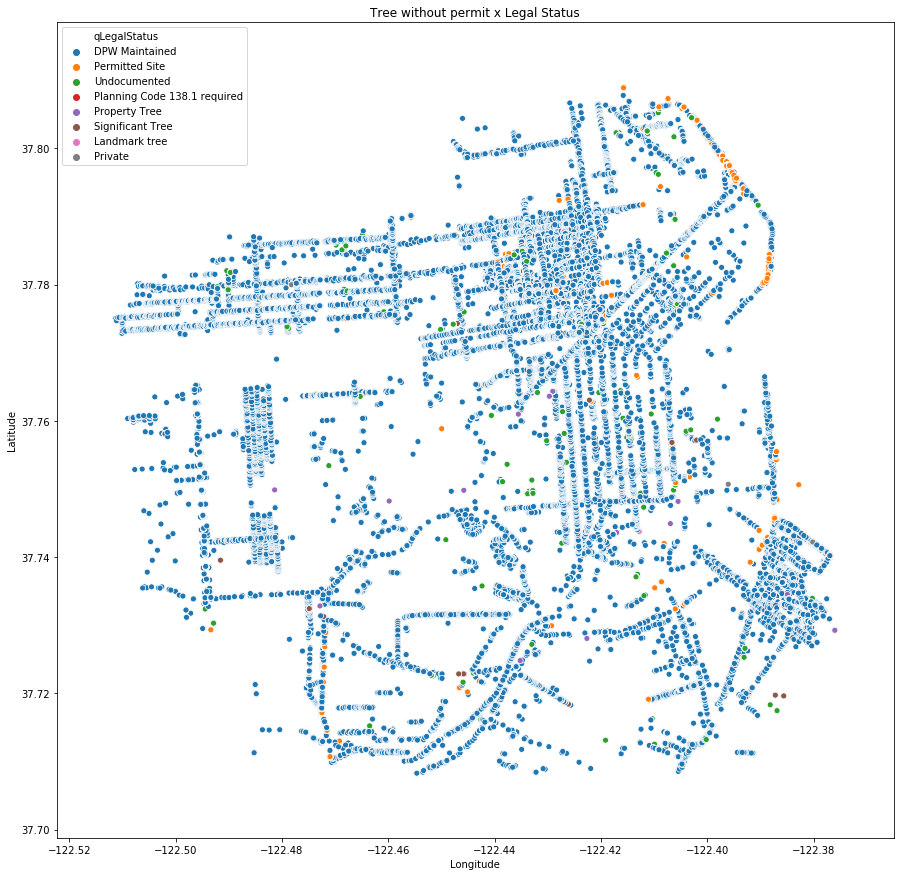

In [127]:
### TREE WITHOUT PERMIT public
plot_data_tree = data_tree.copy()
plot_data_tree = data_tree[(data_tree['Latitude']<40)]
plot_data_tree = data_tree[data_tree['Longitude']>-136]
plot_data_tree = plot_data_tree[(plot_data_tree['Latitude']>37.7)]
plot_data_tree = plot_data_tree[(plot_data_tree['permit_notes'] == 'No')]
plot_data_tree = plot_data_tree[(plot_data_tree['caretaker_priv_pub'] == 'Public')]

plt.figure(figsize=(15,15))
plt.title('Tree without permit x Legal Status')
sns.scatterplot(plot_data_tree.Longitude, plot_data_tree.Latitude, hue=plot_data_tree.qLegalStatus)
plot_data_tree['qLegalStatus'].value_counts()

# DBH vs caretaker

In [128]:
data_tree['DBH'].mean()
data_tree['dbh'] = data_tree['DBH'].fillna(value=data_tree['DBH'].mean())

Text(0.5, 1.0, 'DBH')

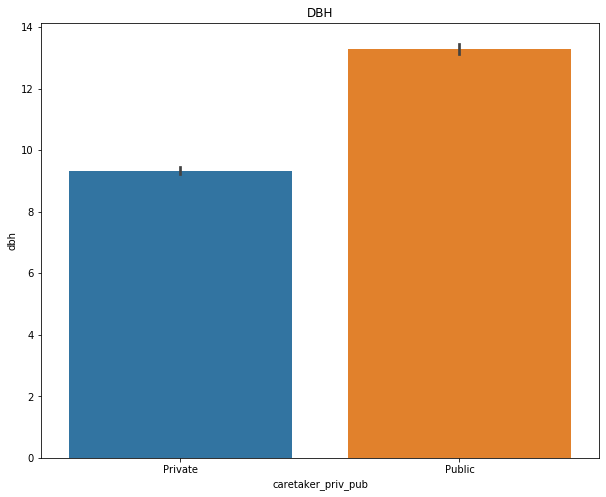

In [129]:
plt.figure(figsize =(10,8))
sns.barplot(data = data_tree, x = 'caretaker_priv_pub', y = 'dbh', estimator = np.mean)
plt.title('DBH')

## Normality Test dbh

In [130]:
from scipy.stats import shapiro, normaltest, anderson
def try_normal(data):
    result = {'Anderson' : {i:j for i,j in zip(anderson(data)[2], anderson(data)[1])}, 'Shapiro': shapiro(data)[1], 
     'K^2': normaltest(data)[1]}
    result['Anderson']['stat'] = anderson(data)[0]
    return result

In [131]:
try_normal(data_tree['dbh'])

C:\Users\DEPOSIT\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning:

p-value may not be accurate for N > 5000.



{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.918,
  1.0: 1.092,
  'stat': 41035.051756422414},
 'Shapiro': 0.0,
 'K^2': 0.0}

Not normal

# Apakah ada faktor yang mempengaruhi pemilihan spesies tanaman?

In [132]:
table2, results2 = rp.crosstab(tree['group_genus'], tree['caretaker_priv_pub'], prop= 'col', test= 'chi-square')
results2

Chi-square test    results
0  Pearson Chi-square ( 9.0) =   4302.6962
1                    p-value =      0.0000
2                 Cramer's V =      0.1493

In [133]:
table3, results3 = rp.crosstab(tree['group_genus'], tree['plant_years'], prop= 'col', test= 'chi-square')
results3

Chi-square test     results
0  Pearson Chi-square ( 72.0) =   55364.7799
1                     p-value =       0.0000
2                  Cramer's V =       0.1894

In [134]:
table4, results4 = rp.crosstab(tree['group_genus'], tree['permitstatus'], prop= 'col', test= 'chi-square')
results4

Chi-square test     results
0  Pearson Chi-square ( 9.0) =   27028.9770
1                    p-value =       0.0000
2                 Cramer's V =       0.3743

In [135]:
tree['yearplant']= tree['plant_date'].dt.year

In [136]:
gov=[]
gov2=[]
for item in tree['yearplant']:
    gov.append(item)
for item2 in gov:
    if item2 == float:
        item2=int(item2)
    else:
        item2 = 0
for item2 in gov:
    if item2==2010 or item2==2011 or item2==2012 or item2==2013 or item2==2014:
        gov2.append('before Gov Planning')
    elif item2==2015 or item2==2016 or item2==2017 or item2==2018 or item2==2019:
        gov2.append('after Gov Planning')
    else:
        gov2.append('0')
tree['Gov Planning']=gov2

In [137]:
tree[tree['Gov Planning']=='after Gov Planning'][tree['caretaker_priv_pub']=='Public'][tree['group_genus']=='Ficus']

C:\Users\DEPOSIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



TreeID    qLegalStatus  \
2070      4709  DPW Maintained   
3411     15170  DPW Maintained   
3412    258095  DPW Maintained   
3416    258094  DPW Maintained   
23480   260860  DPW Maintained   
24147    14661  DPW Maintained   
24992   143034  DPW Maintained   
41732    25479  DPW Maintained   
43198    12245  DPW Maintained   
43616    12246  DPW Maintained   
46190    13036  DPW Maintained   
50876   113468    Undocumented   
86628      571  DPW Maintained   
90615   253907  DPW Maintained   
97356    21808  DPW Maintained   
97357    21805  DPW Maintained   
97363    21807  DPW Maintained   
116959   15429  DPW Maintained   
157462   11025  DPW Maintained   
159213    4455  DPW Maintained   
167208    6742  DPW Maintained   
168923  128382    Undocumented   
177016   18465  DPW Maintained   
189578    4592  DPW Maintained   

                                                 qSpecies           qAddress  \
2070                           Ficus nitida :: Laurel Fig   968 Columbus Ave   
3411    Ficus microcarpa nitida 'Green Gem' :: Indian ...     941 Mission St   
3412    Ficus microcarpa nitida 'Green Gem' :: Indian ...     941 Mission St   
3416    Ficus microcarpa nitida 'Green Gem' :: Indian ...     941 Mission St   
23480                  Ficus microcarpa :: Chinese Banyan    695 Arkansas St   
24147   Ficus microcarpa nitida 'Green Gem' :: Indian ...  683 McAllister St   
24992                   Ficus retusa nitida :: Banyan Fig     670 LOMBARD ST   
41732   Ficus microcarpa nitida 'Green Gem' :: Indian ...    513 Potrero Ave   
43198                          Ficus nitida :: Laurel Fig      503 Laguna St   
43616                          Ficus nitida :: Laurel Fig      501 Laguna St   
46190                          Ficus nitida :: Laurel Fig     490 Lombard St   
50876                   Ficus retusa nitida :: Banyan Fig      450 CHURCH ST   
86628                  Ficus microcarpa :: Chinese Banyan       2970 24th St   
90615                   Ficus retusa nitida :: Banyan Fig       2807 Pine St   
97356                          Ficus nitida :: Laurel Fig    2600X Taylor St   
97357                          Ficus nitida :: Laurel Fig    2600X Taylor St   
97363                          Ficus nitida :: Laurel Fig    2600X Taylor St   
116959  Ficus microcarpa nitida 'Green Gem' :: Indian ...    2125 Mission St   
157462  Ficus microcarpa nitida 'Green Gem' :: Indian ...       1432 Hyde St   
159213                         Ficus nitida :: Laurel Fig     1404 Church St   
167208                 Ficus microcarpa :: Chinese Banyan  1300X Fairfax Ave   
168923  Ficus microcarpa nitida 'Green Gem' :: Indian ...     127 Trenton St   
177016                         Ficus nitida :: Laurel Fig   1176 Potrero Ave   
189578  Ficus microcarpa nitida 'Green Gem' :: Indian ...   100 Columbus Ave   

        SiteOrder                         qSiteInfo PlantType  \
2070          3.0      Sidewalk: Curb side : Cutout      Tree   
3411          1.0      Sidewalk: Curb side : Cutout      Tree   
3412          3.0      Sidewalk: Curb side : Cutout      Tree   
3416          2.0      Sidewalk: Curb side : Cutout      Tree   
23480         3.0      Sidewalk: Curb side : Cutout      Tree   
24147         1.0      Sidewalk: Curb side : Cutout      Tree   
24992         1.0      Sidewalk: Curb side : Cutout      Tree   
41732         1.0      Sidewalk: Curb side : Cutout      Tree   
43198         3.0      Sidewalk: Curb side : Cutout      Tree   
43616         2.0      Sidewalk: Curb side : Cutout      Tree   
46190         3.0      Sidewalk: Curb side : Cutout      Tree   
50876         4.0      Sidewalk: Curb side : Cutout      Tree   
86628         2.0      Sidewalk: Curb side : Cutout      Tree   
90615         1.0      Sidewalk: Curb side : Cutout      Tree   
97356        13.0  Sidewalk: Property side : Cutout      Tree   
97357        10.0      Sidewalk: Curb side : Cutout      Tree   
97363        12.0  Sidewalk: Property side : Cutout

In [138]:
tree[tree['Gov Planning']=='before Gov Planning'][tree['caretaker_priv_pub']=='Public'][tree['group_genus']=='Ficus']

C:\Users\DEPOSIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



TreeID    qLegalStatus  \
116359    7342  DPW Maintained   
146853    6852  DPW Maintained   

                                                 qSpecies           qAddress  \
116359  Ficus microcarpa nitida 'Green Gem' :: Indian ...   2142 Fillmore St   
146853                                      Ficus Spp. ::  1595X Fairfax Ave   

        SiteOrder                     qSiteInfo PlantType qCaretaker  \
116359        1.0  Sidewalk: Curb side : Cutout      Tree        DPW   
146853        1.0  Sidewalk: Curb side : Cutout      Tree        DPW   

       qCareAssistant                PlantDate  ...  \
116359            NaN  2011-06-30T00:00:00.000  ...   
146853            NaN  2014-04-01T00:00:00.000  ...   

                                species_name  \
116359  Ficus microcarpa nitida 'Green Gem'    
146853                           Ficus Spp.    

                                common_name group_genus  site_info  \
116359   Indian Laurel Fig Tree 'Green Gem'       Ficus   Sidewalk   
146853                                            Ficus   Sidewalk   

        caretaker_priv_pub  plant_date  plant_years permitstatus yearplant  \
116359              Public  2011-06-30        2010s    No Permit    2011.0   
146853              Public  2014-04-01        2010s    No Permit    2014.0   

               Gov Planning  
116359  before Gov Planning  
146853  before Gov Planning  

[2 rows x 28 columns]

# G.1
after = 146
before = 55

In [139]:
tree[tree['Gov Planning']=='after Gov Planning'][tree['qCaretaker']=='DPW'][tree['group_genus']=='Ficus']

C:\Users\DEPOSIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



TreeID    qLegalStatus  \
2070      4709  DPW Maintained   
3411     15170  DPW Maintained   
3412    258095  DPW Maintained   
3416    258094  DPW Maintained   
23480   260860  DPW Maintained   
24147    14661  DPW Maintained   
24992   143034  DPW Maintained   
41732    25479  DPW Maintained   
43198    12245  DPW Maintained   
43616    12246  DPW Maintained   
46190    13036  DPW Maintained   
86628      571  DPW Maintained   
90615   253907  DPW Maintained   
97356    21808  DPW Maintained   
97357    21805  DPW Maintained   
97363    21807  DPW Maintained   
116959   15429  DPW Maintained   
157462   11025  DPW Maintained   
159213    4455  DPW Maintained   
167208    6742  DPW Maintained   
177016   18465  DPW Maintained   
189578    4592  DPW Maintained   

                                                 qSpecies           qAddress  \
2070                           Ficus nitida :: Laurel Fig   968 Columbus Ave   
3411    Ficus microcarpa nitida 'Green Gem' :: Indian ...     941 Mission St   
3412    Ficus microcarpa nitida 'Green Gem' :: Indian ...     941 Mission St   
3416    Ficus microcarpa nitida 'Green Gem' :: Indian ...     941 Mission St   
23480                  Ficus microcarpa :: Chinese Banyan    695 Arkansas St   
24147   Ficus microcarpa nitida 'Green Gem' :: Indian ...  683 McAllister St   
24992                   Ficus retusa nitida :: Banyan Fig     670 LOMBARD ST   
41732   Ficus microcarpa nitida 'Green Gem' :: Indian ...    513 Potrero Ave   
43198                          Ficus nitida :: Laurel Fig      503 Laguna St   
43616                          Ficus nitida :: Laurel Fig      501 Laguna St   
46190                          Ficus nitida :: Laurel Fig     490 Lombard St   
86628                  Ficus microcarpa :: Chinese Banyan       2970 24th St   
90615                   Ficus retusa nitida :: Banyan Fig       2807 Pine St   
97356                          Ficus nitida :: Laurel Fig    2600X Taylor St   
97357                          Ficus nitida :: Laurel Fig    2600X Taylor St   
97363                          Ficus nitida :: Laurel Fig    2600X Taylor St   
116959  Ficus microcarpa nitida 'Green Gem' :: Indian ...    2125 Mission St   
157462  Ficus microcarpa nitida 'Green Gem' :: Indian ...       1432 Hyde St   
159213                         Ficus nitida :: Laurel Fig     1404 Church St   
167208                 Ficus microcarpa :: Chinese Banyan  1300X Fairfax Ave   
177016                         Ficus nitida :: Laurel Fig   1176 Potrero Ave   
189578  Ficus microcarpa nitida 'Green Gem' :: Indian ...   100 Columbus Ave   

        SiteOrder                         qSiteInfo PlantType qCaretaker  \
2070          3.0      Sidewalk: Curb side : Cutout      Tree        DPW   
3411          1.0      Sidewalk: Curb side : Cutout      Tree        DPW   
3412          3.0      Sidewalk: Curb side : Cutout      Tree        DPW   
3416          2.0      Sidewalk: Curb side : Cutout      Tree        DPW   
23480         3.0      Sidewalk: Curb side : Cutout      Tree        DPW   
24147         1.0      Sidewalk: Curb side : Cutout      Tree        DPW   
24992         1.0      Sidewalk: Curb side : Cutout      Tree        DPW   
41732         1.0      Sidewalk: Curb side : Cutout      Tree        DPW   
43198         3.0      Sidewalk: Curb side : Cutout      Tree        DPW   
43616         2.0      Sidewalk: Curb side : Cutout      Tree        DPW   
46190         3.0      Sidewalk: Curb side : Cutout      Tree        DPW   
86628         2.0      Sidewalk: Curb side : Cutout      Tree        DPW   
90615         1.0      Sidewalk: Curb side : Cutout      Tree        DPW   
97356        13.0  Sidewalk: Property side : Cutout      Tree        DPW   
97357        10.0      Sidewalk: Curb side : Cutout      Tree        DPW   
97363        12.0  Sidewalk: Property side : Cutout      Tree        DPW   
116959        1.0      Sidewalk: Curb side : Cutout      Tree        DPW   
157462        1.

In [140]:
tree[tree['Gov Planning']=='before Gov Planning'][tree['qCaretaker']=='DPW'][tree['group_genus']=='Ficus']

C:\Users\DEPOSIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



TreeID    qLegalStatus  \
116359    7342  DPW Maintained   
146853    6852  DPW Maintained   

                                                 qSpecies           qAddress  \
116359  Ficus microcarpa nitida 'Green Gem' :: Indian ...   2142 Fillmore St   
146853                                      Ficus Spp. ::  1595X Fairfax Ave   

        SiteOrder                     qSiteInfo PlantType qCaretaker  \
116359        1.0  Sidewalk: Curb side : Cutout      Tree        DPW   
146853        1.0  Sidewalk: Curb side : Cutout      Tree        DPW   

       qCareAssistant                PlantDate  ...  \
116359            NaN  2011-06-30T00:00:00.000  ...   
146853            NaN  2014-04-01T00:00:00.000  ...   

                                species_name  \
116359  Ficus microcarpa nitida 'Green Gem'    
146853                           Ficus Spp.    

                                common_name group_genus  site_info  \
116359   Indian Laurel Fig Tree 'Green Gem'       Ficus   Sidewalk   
146853                                            Ficus   Sidewalk   

        caretaker_priv_pub  plant_date  plant_years permitstatus yearplant  \
116359              Public  2011-06-30        2010s    No Permit    2011.0   
146853              Public  2014-04-01        2010s    No Permit    2014.0   

               Gov Planning  
116359  before Gov Planning  
146853  before Gov Planning  

[2 rows x 28 columns]

# G.2
after = 22
before = 2

In [141]:
tree[tree['Gov Planning']=='before Gov Planning'][tree['permitstatus']=='There Are Permit'][tree['group_genus']=='Ficus']

C:\Users\DEPOSIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



TreeID    qLegalStatus  \
17046    59124  DPW Maintained   
20438   104472  DPW Maintained   
20439   104468  DPW Maintained   
20440   104470  DPW Maintained   
20441   104473  DPW Maintained   
20442   104475  DPW Maintained   
20443   104474  DPW Maintained   
20444   104469  DPW Maintained   
20445   104471  DPW Maintained   
24544    94021  Permitted Site   
27272    96930  Permitted Site   
29324   142514  DPW Maintained   
29325   142515  DPW Maintained   
29624   142505  Permitted Site   
32410   107654  DPW Maintained   
32411   107653  DPW Maintained   
32412   107652  DPW Maintained   
45493    93215  Permitted Site   
57985    98224  Permitted Site   
60965   106674  DPW Maintained   
63713    96411  Permitted Site   
66823   104274  DPW Maintained   
95502   106734  DPW Maintained   
99047    97190  Permitted Site   
99048    67032  Permitted Site   
99049    97191  Permitted Site   
99050    97189  Permitted Site   
101076   45566  DPW Maintained   
101081   45567  DPW Maintained   
103388   94219  Permitted Site   
103389   94217  Permitted Site   
103392   94218  Permitted Site   
107522   98442  DPW Maintained   
111162   87761  DPW Maintained   
113172  100707  Permitted Site   
113173  100710  Permitted Site   
113174  100706  Permitted Site   
113175  100705  Permitted Site   
113176  100708  Permitted Site   
116617   97937  DPW Maintained   
125099   94216  Permitted Site   
128917   61837  DPW Maintained   
130352   97662  Permitted Site   
132511   93706  DPW Maintained   
132809   81902  DPW Maintained   
134402  107592  DPW Maintained   
137981   93719  DPW Maintained   
157375  100306  DPW Maintained   
159761  105340  DPW Maintained   
170898  103718  DPW Maintained   
172221  101014  DPW Maintained   
187517   31505  DPW Maintained   

                                                 qSpecies            qAddress  \
17046   Ficus microcarpa nitida 'Green Gem' :: Indian ...        758 10th Ave   
20438   Ficus microcarpa nitida 'Green Gem' :: Indian ...      717 Battery St   
20439   Ficus microcarpa nitida 'Green Gem' :: Indian ...      717 Battery St   
20440   Ficus microcarpa nitida 'Green Gem' :: Indian ...      717 Battery St   
20441   Ficus microcarpa nitida 'Green Gem' :: Indian ...      717 Battery St   
20442   Ficus microcarpa nitida 'Green Gem' :: Indian ...      717 Battery St   
20443   Ficus microcarpa nitida 'Green Gem' :: Indian ...      717 Battery St   
20444   Ficus microcarpa nitida 'Green Gem' :: Indian ...      717 Battery St   
20445   Ficus microcarpa nitida 'Green Gem' :: Indian ...      717 Battery St   
24544                  Ficus microcarpa :: Chinese Banyan         67 Elsie St   
27272   Ficus microcarpa nitida 'Green Gem' :: Indian ...       649 Natoma St   
29324                   Ficus retusa nitida :: Banyan Fig      624 VALLEJO ST   
29325                   Ficus retusa nitida :: Banyan Fig      624 VALLEJO ST   
29624                   Ficus retusa nitida :: Banyan Fig      620 Vallejo St   
32410                          Ficus nitida :: Laurel Fig      600 Octavia St   
32411                          Ficus nitida :: Laurel Fig      600 Octavia St   
32412                          Ficus nitida :: Laurel Fig      600 Octavia St   
45493                          Ficus nitida :: Laurel Fig      499 Jackson St   
57985                          Ficus nitida :: Laurel Fig        4068 25th St   
60965   Ficus microcarpa nitida 'Green Gem' :: Indian ...       399 Laurel St   
63713                          Ficus nitida :: Laurel Fig     3828 Jackson St   
66823   Ficus microcarpa nitida 'Green Gem' :: Indian ...  3675 Washington St   
95502   Ficus microcarpa nitida 'Green Gem' :: Indian ...    2652 Chestnut St   
99047                  Ficus microcarpa :: Chinese Banyan   255 California St   
99048                  Ficus microcarpa :: Chinese Banyan   255 California St   
99049                  Ficus microcarpa :: Chinese Banyan   255 California St   
99050             

In [142]:
tree[tree['Gov Planning']=='after Gov Planning'][tree['permitstatus']=='There Are Permit'][tree['group_genus']=='Ficus']

C:\Users\DEPOSIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



TreeID    qLegalStatus  \
12578   104320    Undocumented   
23594   224880  DPW Maintained   
23595    95413    Undocumented   
29426   127892  DPW Maintained   
31417     9941  Permitted Site   
...        ...             ...   
179753     843  DPW Maintained   
179818   18307  DPW Maintained   
180460   59271  Permitted Site   
183275    5591  DPW Maintained   
185041   20151  DPW Maintained   

                                                 qSpecies          qAddress  \
12578                          Ficus nitida :: Laurel Fig      80 Beaver St   
23594   Ficus microcarpa nitida 'Green Gem' :: Indian ...    691 Chenery St   
23595                          Ficus nitida :: Laurel Fig    691 Chenery St   
29426   Ficus microcarpa nitida 'Green Gem' :: Indian ...      623 Green St   
31417                          Ficus nitida :: Laurel Fig     601X Green St   
...                                                   ...               ...   
179753  Ficus microcarpa nitida 'Green Gem' :: Indian ...  111X Potrero Ave   
179818  Ficus microcarpa nitida 'Green Gem' :: Indian ...   111 Potrero Ave   
180460                         Ficus nitida :: Laurel Fig    110 Webster St   
183275  Ficus microcarpa nitida 'Green Gem' :: Indian ...   1088 Dolores St   
185041                  Ficus retusa nitida :: Banyan Fig   1043 Steiner St   

        SiteOrder                     qSiteInfo PlantType qCaretaker  \
12578         1.0  Sidewalk: Curb side : Cutout      Tree    Private   
23594         1.0  Sidewalk: Curb side : Cutout      Tree    Private   
23595         1.0  Sidewalk: Curb side : Cutout      Tree    Private   
29426         1.0  Sidewalk: Curb side : Cutout      Tree    Private   
31417         1.0  Sidewalk: Curb side : Cutout      Tree    Private   
...           ...                           ...       ...        ...   
179753        2.0  Sidewalk: Curb side : Cutout      Tree    Private   
179818        1.0  Sidewalk: Curb side : Cutout      Tree    Private   
180460        1.0  Sidewalk: Curb side : Cutout      Tree    Private   
183275        1.0  Sidewalk: Curb side : Cutout      Tree    Private   
185041        1.0  Sidewalk: Curb side : Cutout      Tree    Private   

       qCareAssistant                PlantDate  ...  \
12578             NaN  2016-08-09T00:00:00.000  ...   
23594             NaN  2016-10-19T00:00:00.000  ...   
23595             NaN  2016-10-19T00:00:00.000  ...   
29426             NaN  2016-10-12T00:00:00.000  ...   
31417             NaN  2016-10-12T00:00:00.000  ...   
...               ...                      ...  ...   
179753            NaN  2015-12-31T00:00:00.000  ...   
179818            NaN  2015-12-31T00:00:00.000  ...   
180460            NaN  2017-01-09T00:00:00.000  ...   
183275            NaN  2016-07-01T00:00:00.000  ...   
185041            NaN  2016-10-13T00:00:00.000  ...   

                                species_name  \
12578                          Ficus nitida    
23594   Ficus microcarpa nitida 'Green Gem'    
23595                          Ficus nitida    
29426   Ficus microcarpa nitida 'Green Gem'    
31417                          Ficus nitida    
...                                      ...   
179753  Ficus microcarpa nitida 'Green Gem'    
179818  Ficus microcarpa nitida 'Green Gem'    
180460                         Ficus nitida    
183275  Ficus microcarpa nitida 'Green Gem'    
185041                  Ficus retusa nitida    

                                common_name group_genus  site_info  \
12578                            Laurel Fig       Ficus   Sidewalk   
23594    Indian Laurel Fig Tree 'Green Gem'       Ficus   Sidewalk   
23595                            Laurel Fig       Ficus   Sidewalk   
29426    Indian Laurel Fig Tree 'Green Gem'       Ficus   Sidewalk   
31417                            Laurel Fig       Ficus   Sidewalk   
...                                     ...         ...        ...   
179753   Indian Laurel Fig Tree 'Green Gem'       Ficus  

# G.3
before = 52
after = 62

In [143]:
tree[tree['caretaker_priv_pub']=='Public']['qCareAssistant'].describe()

count                    1946
unique                     10
top       DPW for City Agency
freq                      797
Name: qCareAssistant, dtype: object

FUF = "Friends of the Urban Forest" 
We’re a non-profit organization located in the Presidio, led by a dedicated Board of Directors and staffed by a terrific team.

# Urban Forest Plan

In [177]:
plant_year_specified = []
for i in plot_data_tree.index:
    plant_year_specified.append(plot_data_tree['plant_date'][i].year)
plot_data_tree['specified_year'] = plant_year_specified

In [178]:
privpub = []
for i in plot_data_tree.index:
    if plot_data_tree['qCaretaker'][i]=='Private':
        privpub.append('Private')
    else:
        privpub.append('Public')

In [179]:
plot_data_tree['caretaker_priv_pub'] = privpub

In [180]:
plot_data_tree['caretaker_priv_pub'].value_counts()

Private    160028
Public      29927
Name: caretaker_priv_pub, dtype: int64

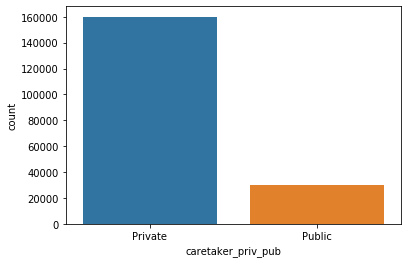

In [181]:
sns.countplot(data = plot_data_tree, x = 'caretaker_priv_pub')

In [182]:
before = []
after = []
for i in plot_data_tree.index:
    if plot_data_tree['specified_year'][i] > 2015:
        after.append(plot_data_tree['caretaker_priv_pub'][i])
    elif plot_data_tree['specified_year'][i] > 2009 and plot_data_tree['specified_year'][i] < 2015:
        before.append(plot_data_tree['caretaker_priv_pub'][i])

In [183]:
privbef = 0
pubbef = 0
for i in range(len(before)):
    if before[i] == 'Private':
        privbef += 1
    else:
        pubbef += 1

In [184]:
privbef

4928

In [185]:
pubbef

1316

Text(0.5, 1.0, 'Trees planted 2010-2014')

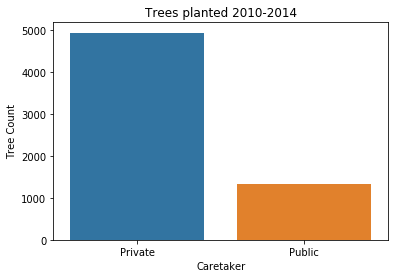

In [186]:
sns.countplot(x = before)
plt.xlabel('Caretaker')
plt.ylabel('Tree Count')
plt.title('Trees planted 2010-2014')

In [187]:
privaft = 0
pubaft = 0
for i in range(len(after)):
    if before[i] == 'Private':
        privaft += 1
    else:
        pubaft += 1

In [188]:
privaft

4575

In [189]:
pubaft

1181

Text(0.5, 1.0, 'Trees planted 2015-2019')

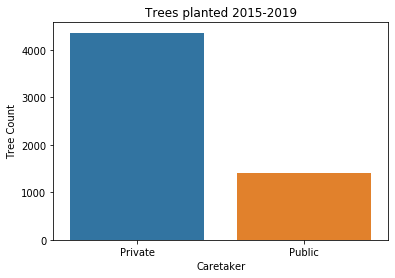

In [190]:
sns.countplot(x = after)
plt.xlabel('Caretaker')
plt.ylabel('Tree Count')
plt.title('Trees planted 2015-2019')

In [191]:
permit = []
for i in plot_data_tree.index:
    if plot_data_tree['caretaker_priv_pub'][i] == 'Public':
        permit.append('Public')
    else:
        if pd.isna(plot_data_tree['PermitNotes'][i]):
            permit.append('No')
        else:
            permit.append('Yes')

In [192]:
plot_data_tree['Permitted'] = permit

In [193]:
plot_data_tree['Permitted'].value_counts()

No        110499
Yes        49529
Public     29927
Name: Permitted, dtype: int64

In [194]:
before_pn = []
after_pn = []
for i in plot_data_tree.index:
    if plot_data_tree['specified_year'][i] > 2015:
        after_pn.append(plot_data_tree['Permitted'][i])
    elif plot_data_tree['specified_year'][i] > 2009 and plot_data_tree['specified_year'][i] < 2015:
        before_pn.append(plot_data_tree['Permitted'][i])

In [195]:
yesbef_pn = 0
nobef_pn = 0
for i in range(len(before_pn)):
    if before_pn[i] == 'Public':
        pass
    elif before_pn[i] == 'Yes':
        yesbef_pn += 1
    else:
        nobef_pn += 1

In [197]:
yesbef_pn

4627

In [198]:
nobef_pn

301

Text(0.5, 1.0, 'Trees planted by Private 2010-2014')

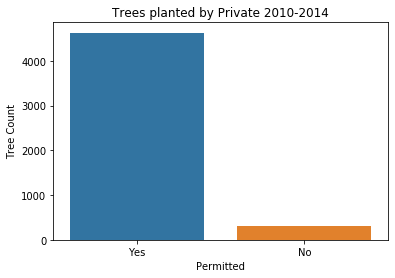

In [199]:
sns.countplot(before_pn, order=['Yes','No'])
plt.xlabel('Permitted')
plt.ylabel('Tree Count')
plt.title('Trees planted by Private 2010-2014')

In [200]:
yesaft_pn = 0
noaft_pn = 0
for i in range(len(after_pn)):
    if after_pn[i] == 'Public':
        pass
    elif after_pn[i] == 'Yes':
        yesaft_pn += 1
    else:
        noaft_pn += 1

In [202]:
yesaft_pn

2699

In [203]:
noaft_pn

1658

Text(0.5, 1.0, 'Trees planted by Private 2015-2019')

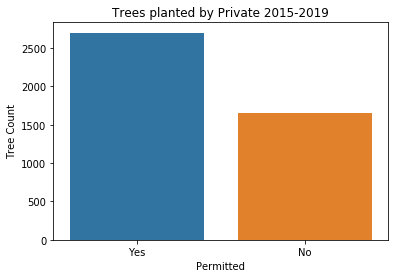

In [204]:
sns.countplot(after_pn, order=['Yes','No'])
plt.xlabel('Permitted')
plt.ylabel('Tree Count')
plt.title('Trees planted by Private 2015-2019')